# Research Question [RQs]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
from defs import *

## 1. [RQ1] Exploratory Data Analysis (EDA)

The first thing we do is open and read our dataset, using pandas and the pd.read_json command

In [3]:
path_a = "D:\Primo Semestre\ADM\HW2\lighter_authors.json"
df_a= pd.read_json(path_a, lines= True)

In the next few lines of code, we will try to get general insight about the dataset; in particular what we want to know is:
- All the features we have for each row, using the columns command.
- The number of rows and number of features each row has, using the shape command.
- Get a first sight of how the values are stored, using the head() or tail() command.
- Retrive information about the type of values each feature is represented with, using the info() command.
- Check for the integrity of data:
  - Looking if there's duplicated data, using the nunique() function.
  - Looking if there's missing data, using the isnull() command.
  - Check if there is some unknown data and replacing it with NaN values.


In [5]:
# about the authors file
df_a.columns

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')

In [6]:
print('The number of authors in the file:',df_a.shape[0])
print('The number of feature for each book:', df_a.shape[1])

The number of authors in the file: 351767
The number of feature for each book: 12


In [7]:
df_a.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [8]:
df_a.tail()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,https://images.gr-assets.com/authors/149373532...,Lyon Gamer<br />nickname sotto cui si nasconde...,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Brian was born, he lived a little, and he has ...",0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Nicholas Baer is Visiting Assistant Professor ...,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"James Ross was a physician, winemaker, artist,...",0
351766,1,5.00,0,[49933850],[29597374],1,16777164,James Ross,,https://s.gr-assets.com/assets/nophoto/user/u_...,<i>Librarian Note: There is more than one auth...,0


In [9]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [10]:
df_a.isnull().sum()

ratings_count         0
average_rating        0
text_reviews_count    0
work_ids              0
book_ids              0
works_count           0
id                    0
name                  0
gender                0
image_url             0
about                 0
fans_count            0
dtype: int64

The books file had to be opened in a different way because of size issues; we performed the following steps to handle better the file:
- we used the option 'chuncksize' inside the pandas command to read the json file, and then read each chunk as a dataframe. 
- Created a new dataframe without the attributes no needed for the RQ2 and RQ3, to speed up the execution.

Addittionally, since the attribute 'authors' in the 'ligher_books.json' file is missing 76.2% of the time, and contains informations already present in the 'author_name' and 'author_id', we decided to discard it. 


In [10]:
path_b = "D:\Primo Semestre\ADM\HW2\lighter_books.json"
chunk = pd.read_json(path_b, lines=True, chunksize=10000)
count_lines = sum(1 for line in open(path_b))
null_vals_authors = 0
for c in chunk:
    null_val_authors_in_c = c.authors.isnull().sum()
    null_vals_authors += null_val_authors_in_c
    
print("Percentage of Null values in the authors in the file:" ,null_vals_authors/count_lines)


Percentage of Null values in the authors in the file: 0.7623363073475545


In [2]:
path_b = "D:\Primo Semestre\ADM\HW2\lighter_books.json"
chunk = pd.read_json(path_b, lines=True, chunksize=10000)
df_b = []
for c in chunk:
    c = c.drop(['authors'], axis = 1)
    c = c.drop(['isbn'], axis = 1)
    c = c.drop(['isbn13'], axis = 1)
    c = c.drop(['asin'], axis = 1)
    c = c.drop(['image_url'], axis = 1)
    c = c.drop(['format'], axis = 1)
    c = c.drop(['rating_dist'], axis = 1)
    c = c.drop(['edition_information'], axis = 1)
    c = c.drop(['publisher'], axis = 1)
    c = c.drop(['series_id'], axis = 1)
    c = c.drop(['series_name'], axis = 1)
    c = c.drop(['series_position'], axis = 1)
    c = c.drop(['shelves'], axis = 1)
    c = c.drop(['description'], axis = 1)
    c = c[c.author_name != 'NOT A BOOK']
    df_b.append(c)
df_b = pd.concat(df_b, ignore_index=True)  
print(df_b.columns)

# 7min

Index(['id', 'title', 'author_name', 'author_id', 'work_id', 'language',
       'average_rating', 'ratings_count', 'text_reviews_count',
       'publication_date', 'original_publication_date', 'num_pages'],
      dtype='object')


In [5]:
print('The number of books in the file:',df_b.shape[0])

The number of books in the file: 6988842


In [6]:
df_b.head()

,id,title,author_name,author_id,work_id,language,average_rating,ratings_count,text_reviews_count,publication_date,original_publication_date,num_pages
0,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,1077326,2809203,eng,4.50,2628006,44716,2004-09,2003-06-21,870
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,4640799,eng,4.48,7377351,116930,2003-11-01,1997-06-26,309
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,1077326,6231171,eng,4.43,2855044,55286,2003-11-01,1998-07-02,352
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,1077326,2402163,eng,4.57,2946694,58023,2004-05-01,1999-07-08,435
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,1077326,3046572,eng,4.56,2705676,48637,2002-09-28,2000-07-08,734


In [7]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988842 entries, 0 to 6988841
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   title                      object 
 2   author_name                object 
 3   author_id                  int64  
 4   work_id                    int64  
 5   language                   object 
 6   average_rating             float64
 7   ratings_count              int64  
 8   text_reviews_count         int64  
 9   publication_date           object 
 10  original_publication_date  object 
 11  num_pages                  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 639.8+ MB


Now we will clean the dataset by:
- Checking for the correctnes of the values 
- Figuring out if data is redondant

In [8]:
df_a.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


As we can see with the describe option, there are some values in the columns 'ratings_count', 'average_rating' and 'fans_count' that are negative, even though it makes no sense; so we'll clean the dataframe replacing those values with NaN values, instead of deleating them, in order to not loose meaningful data

In [12]:
df_a.loc[:, 'ratings_count'] = df_a['ratings_count'].apply(lambda x: np.nan if x <0 else x )
df_a.loc[:, 'average_rating'] = df_a['average_rating'].apply(lambda x: np.nan if x<0 else x)
df_a.loc[:,'fans_count'] = df_a['fans_count'].apply(lambda x: np.nan if x<0 else x)

We saw that there are values of 'works_count' that do not match with the lenght of the list value of 'work_ids', so we substituted the 'works_count' with the lenght of the 'work_ids' for each row.

In [10]:
df_a.groupby('name').agg('sum').sort_values(by='works_count',ascending= False)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,gender,image_url,about,fans_count
name,,,,,,,,,,,
NOT A BOOK,115710.0,4.07,9411,"[45100209, 3628, 1507439, 85644185, 24676995, ...","[25357793, 530270, 1515734, 54883522, 17673542...",1775176,1000834,,https://s.gr-assets.com/assets/nophoto/user/u_...,This profile was created to segregate those it...,4504.0
Jesse Russell,8510.0,4.02,527,"[21723362, 22939358, 22945924, 22579311, 22982...","[15971714, 16706030, 16712573, 16392251, 16739...",186086,5823409,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Bookvika Publishing, VSD, Book on Demand Ltd —...",164.0
Ronald Cohn,8896.0,4.03,603,"[45374727, 42340520, 64602098, 26803594, 64492...","[25573859, 22795625, 41384870, 18855820, 41284...",186047,3393273,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Bookvika Publishing, VSD, Book on Demand Ltd —...",31.0
Anonymous,1434041.0,4.15,78830,"[6405906, 2139868, 3802528, 19119100, 859375, ...","[1923820, 323355, 19351, 280111, 93101, 646462...",182675,5158478,,https://s.gr-assets.com/assets/nophoto/user/u_...,"Books can be attributed to ""Anonymous"" for sev...",2456.0
Unknown,431204.0,3.58,18883,"[189503, 2954048, 15068023, 477, 370900, 11453...","[52357, 3049, 23613, 73419, 381112, 18261, 100...",163434,4699102,,https://s.gr-assets.com/assets/nophoto/user/u_...,"Books can be attributed to ""Unknown"" when the ...",1067.0
...,...,...,...,...,...,...,...,...,...,...,...
John B. Finch,0.0,0.00,0,[49548590],[29312558],1,4255469,male,https://images.gr-assets.com/authors/146204309...,John B. Finch (1852-1887),1.0
Stephen D. Lowe,19.0,3.47,8,[58660006],[36899334],1,18137217,,https://images.gr-assets.com/authors/153184375...,"Stephen D. Lowe (PhD, Michigan State Universit...",1.0
Kamryn Hart,0.0,0.00,0,[],[],0,17146018,female,https://images.gr-assets.com/authors/154145249...,"Kamryn Hart (also known as <a href=""https://ww...",59.0


Is evident that the majority of authors, for number of works, is labeled as 'NOT A BOOK', so we assume those are irrelevant information that can be discarded for the purpuse of our research. \
Others are labeled as 'Anonymous' or 'Unknown'. We decided not to discard them bacause are information relevant for our aim, so we will take acount of them.

In [14]:
df_a = df_a[df_a.name != 'NOT A BOOK']

In [13]:
dismatch_number = len(list(df_a.loc[df_a.apply(lambda row: len(row['work_ids']) != row['works_count'], axis=1)].index)) 
print(dismatch_number)
df_a['works_count'] = df_a['work_ids'].apply(len)

444


Fix the names of the authors ant book titles that have too many spaces between first and second name.

In [3]:
df_a['name'] = df_a['name'].str.replace(r'\s+', ' ', regex=True)
df_b['author_name'] = df_b['author_name'].str.replace(r'\s+', ' ', regex=True)
df_b['title'] = df_b['title'].str.replace(r'\s+', ' ', regex=True)

In [14]:
df_b.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,6.988842e+06,6.988842e+06,6.988842e+06,6.988842e+06,6.988842e+06,6.988842e+06
mean,1.324039e+07,1.983187e+06,1.388511e+07,3.317175e+00,1.956603e+04,6.452674e+02
std,7.635467e+06,3.218689e+06,1.530428e+07,1.424235e+00,1.613378e+05,4.181029e+03
min,2.000000e+00,4.000000e+00,6.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.909018e+06,3.333400e+04,1.552435e+06,3.370000e+00,3.000000e+00,0.000000e+00
50%,1.382822e+07,2.439300e+05,6.710332e+06,3.820000e+00,4.600000e+01,5.000000e+00
75%,1.950606e+07,3.270439e+06,2.194004e+07,4.080000e+00,7.860000e+02,6.500000e+01
max,2.552102e+07,2.124802e+07,8.972161e+07,5.000000e+00,7.400639e+06,1.745240e+05


Check if the values that we'll need in the next researches need to be cleaned: we will replace no-sense data with NaN values, for a more meaningfull analysis.

In [15]:
print(df_b.groupby(['language']).agg('count'))
print(df_b.groupby(['num_pages']).agg('count'))
print(df_b.groupby(['original_publication_date']).agg('count'))


                id    title  author_name  author_id  work_id  average_rating  \
language                                                                       
           4308960  4308960      4308960    4308960  4308960         4308960   
--             227      227          227        227      227             227   
Select...        1        1            1          1        1               1   
aar              1        1            1          1        1               1   
abk             14       14           14         14       14              14   
...            ...      ...          ...        ...      ...             ...   
zbl              1        1            1          1        1               1   
zho           7623     7623         7623       7623     7623            7623   
znd              2        2            2          2        2               2   
zul             15       15           15         15       15              15   
zun              6        6            6

In [24]:
print(df_b[df_b['publication_date']==''].shape[0])
print(df_b[df_b['original_publication_date']==''].shape[0])

2118769
409460


Since the missing values in the attribute "publication_date" are consistent, in respect to the ones present in the attribute "original_publication_date", we decided to consider only the latter attribute and replaced those values with NaN values. We also replaced some characters, in other columns, that had no sense at all with NaN values. 

In [4]:
to_drop=['','Select...', '--']

df_b['language'] = df_b['language'].apply(lambda x: np.nan if x in to_drop else x) 
df_b['num_pages'] = df_b['num_pages'].apply(lambda x: np.nan if x in to_drop else x) 
df_b['title'] = df_b['title'].apply(lambda x: np.nan if x in to_drop else x) 
df_b.loc[:, 'original_publication_date'] = df_b['original_publication_date'].apply(lambda x: np.nan if x in to_drop else x)
df_b.loc[:, 'num_pages'] = df_b['num_pages'].apply(lambda x: np.nan if x in to_drop else x)

We want to group the english languages that differs only of the country of origin, so we looked for the languages that started with 'en' and sobstiuteted thwm with the more general term 'English'.

In [5]:
words_starting_with_en = df_b[df_b['language'].str.contains(r'\ben', case=False, na=False, regex=True)]['language'].values
print(set(words_starting_with_en))
en = ['en', 'en-CA', 'en-GB', 'eng', 'en-US', 'en-IN']
df_b['language'] = df_b['language'].replace( en, 'English') #grouping the different lables for english 

{'en-CA', 'enm', 'en-US', 'en', 'eng', 'en-GB', 'en-IN'}



Additionaly, the dates are not well-structured, since some are in the format 'YYYY-MM-DD' while others contain only 'YYYY', so we extracted the year from each date and put it in a new column 'pub_year' and, if present, we extracted the month and put it into a new column 'pub_month'.

In [19]:

pattern1 = r'^\d{4}-\d{2}-\d{2}$'  # Pattern 'yyyy-mm-dd'
pattern2 = r'^\d{3}-\d{2}-\d{2}$'  # Pattern 'yyy-mm-dd'
pattern3 = r'^\d{4}$'              # pattern 'yyyy'
pattern4 = r'^\d{3}$'              # pattern 'yyy'

def extract_year(date):
    if pd.notna(date):
        try:
            if re.match(pattern1, date) or re.match(pattern3, date):
                return int(date[:4])
            elif re.match(pattern2, date) or re.match(pattern4,date):
                return int(date[:3])
        except ValueError:
            return None
    else:
        return None        
            
def get_month(date):
    if pd.notna(date):
        try:
            if re.match(pattern1, date):
                return date[5:7]
            elif re.match(pattern2, date):
                return date[4:6]
        except ValueError:
            return None
    else:
        return None
    

df_b['pub_year'] = df_b['original_publication_date'].apply(extract_year) 
df_b['pub_month'] = df_b['original_publication_date'].apply(get_month)  # extract the month where present
df_b = df_b.dropna()
df_b = df_b[df_b['pub_year']<=2023] # keep only the years until 2023
print(df_b.pub_year)

0          2003.0
1          1997.0
2          1998.0
3          1999.0
4          2000.0
            ...  
6988835    2007.0
6988836    1998.0
6988838    2015.0
6988839    2006.0
6988841    2015.0
Name: pub_year, Length: 1014068, dtype: float64


In [20]:
df_b.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count,num_pages,pub_year
count,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06
mean,1.493396e+07,2.451262e+06,1.730540e+07,3.727998e+00,4.763180e+04,1.583599e+03,6.625212e+03,1.998370e+03
std,7.313943e+06,3.332237e+06,1.487662e+07,9.188787e-01,3.010878e+05,7.805502e+03,3.693656e+06,4.729544e+01
min,2.000000e+00,4.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
25%,9.799407e+06,3.927200e+04,2.542059e+06,3.610000e+00,1.200000e+01,2.000000e+00,1.440000e+02,1.999000e+03
50%,1.704204e+07,5.360630e+05,1.694003e+07,3.910000e+00,1.470000e+02,1.700000e+01,2.480000e+02,2.009000e+03
75%,2.075089e+07,4.718528e+06,2.553494e+07,4.150000e+00,2.714000e+03,2.010000e+02,3.540000e+02,2.012000e+03
max,2.552102e+07,2.121742e+07,8.947997e+07,5.000000e+00,7.400639e+06,1.745180e+05,2.147484e+09,2.023000e+03


## 2.[RQ2]

**Plot the number of books for each author in descending order.** \
The plot will show just the top 15 authors for number of books and then is representes the average number of books for all the other authors.  

In [21]:
books_for_authors = df_a.groupby(["id"])[["works_count","id","name"]].agg('sum').sort_values( by="works_count",ascending=False)
books_for_authors.tail()

,works_count,id,name
id,,,
16062543,1,16062543,Boniface Sagini
16062450,1,16062450,Bob Scott
304399,0,304399,W.H. James Weale
17146018,0,17146018,Kamryn Hart
495244,0,495244,L. Adams Beck


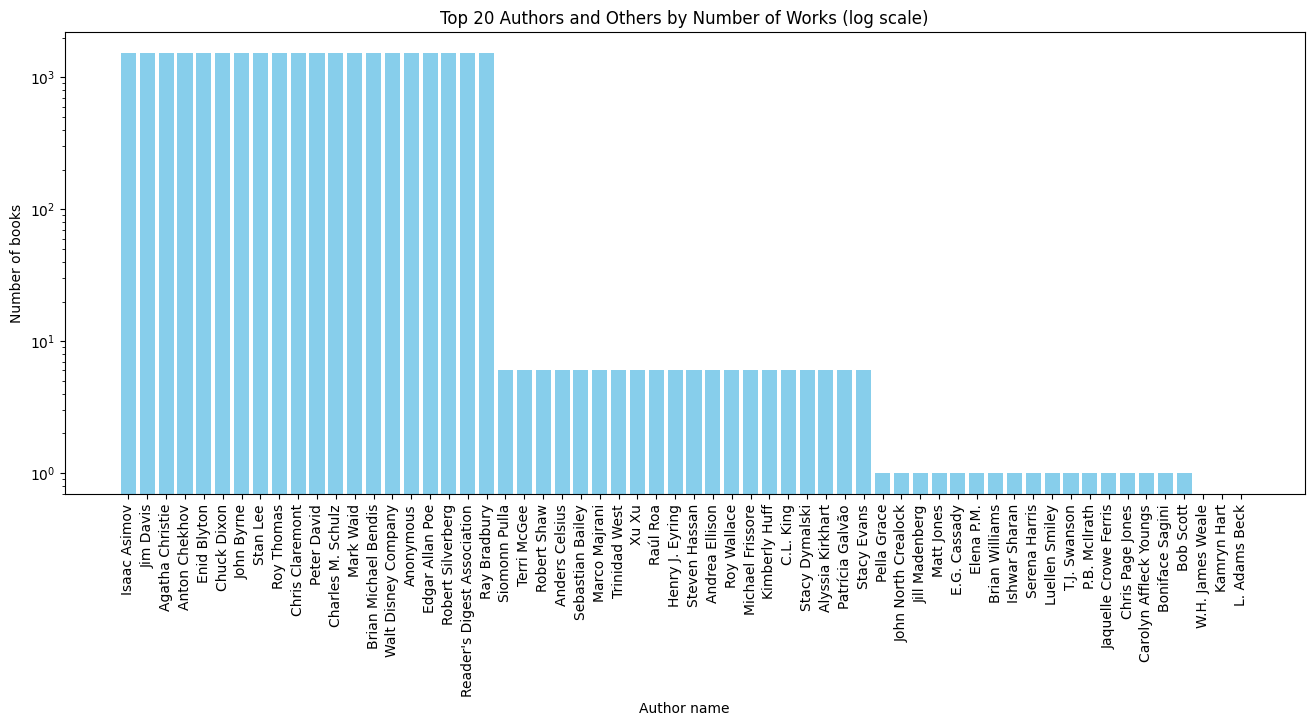

In [22]:
books_for_authors = df_a.groupby(["id"])[["works_count","id","name"]].agg('sum').sort_values( by="works_count",ascending=False)

N = 20
middle = len(books_for_authors.values)//2
#top N authors and the rest
top_authors = books_for_authors.head(N)
middle_authors = books_for_authors.iloc[middle:middle+20]
other_authors = books_for_authors.tail(20)

# Evaluate the mean number of books of the "Others" authors
other_books_count = other_authors['works_count']

others_df = pd.DataFrame({'name': ["Others' average"], 'works_count': [other_books_count]})
combined_df = pd.concat([top_authors,middle_authors, other_authors], ignore_index=True)

plt.figure(figsize=(16, 6))
plt.bar(combined_df['name'], combined_df['works_count'], color='skyblue')
plt.xlabel('Author name')
plt.ylabel('Number of books')
plt.title('Top {0} Authors and Others by Number of Works (log scale)'.format(N))
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**COMMENT**
We showed just the first 20 authors who wrote the higher number of books, the 20 authors in the half of the group who wrote more books and the last 20 authors for number of books written.\
What we can observe from this plot bar, is that the author who worked on more books is Isaac Asimov with about 1600 books. The first two groups of our population are quite homogeneus for number of books; while the third one, the one with the lower number of books, has a difference of just one book: in fact the last three authors, W.H. James Weale, Kamryn Hart and L. Adams Beck, have a count of 0 works. 

**Which book has the highest number of reviews?**

In [23]:
book_most_rev = df_b.sort_values(by= "text_reviews_count", ascending=False).head(1)
book_title = book_most_rev.title.values[0]
book_author = book_most_rev.author_name.values[0]
revs = book_most_rev.text_reviews_count.values[0]
print("The book titled {0}, by {1}, has the highest number of reviews: {2} reviews".format(book_title, book_author, revs))

The book titled Arena smrti (Igre lakote #1), by Suzanne Collins, has the highest number of reviews: 174518 reviews


**Result:** The book titled Arena smrti (Igre lakote #1), by Suzanne Collins, has the highest number of reviews: 174518 reviews

**Which are the top ten and ten worst books concerning the average score?**


In [24]:
top_ten = df_b.sort_values(by= "average_rating", ascending=False).head(10)

top = {'title':[top_ten.values[i][1] for i in range(len(top_ten.values))], 'author':[top_ten.values[i][2] for i in range(len(top_ten.values))],
       'rating': [top_ten.values[i][6] for i in range(len(top_ten.values))] }

df_top = pd.DataFrame(top)
df_top

,title,author,rating
0,Espiritualidade,Doutor Luis Alexandre Ribeiro Branco,5.0
1,Savage Summer,Lucas McWilliams,5.0
2,Beacon: Part V,Jonathan C. Gillespie,5.0
3,Կանչ,Sos Sargsyan,5.0
4,Վարագույրից այս կողմ,Sos Sargsyan,5.0
5,New Testament,Anonymous,5.0
6,Perry Rhodan 2648: Die Seele der Flotte,Christian Montillon,5.0
7,Nueva Enciclopedia Larousse (Atlas),Anonymous,5.0
8,The Open Door & The Present Testimony,Watchman Nee,5.0
9,Aban's Accension,Shireen Jeejeebhoy,5.0


In [25]:
worst_ten = df_b.sort_values(by= "average_rating", ascending=True).head(10)

worst = {'title': [worst_ten.values[i][1] for i in range(len(worst_ten.values))], 'author': [worst_ten.values[i][2] for i in range(len(worst_ten.values))],
         'rating': [worst_ten.values[i][6] for i in range(len(worst_ten.values))] }

df_worst = pd.DataFrame(worst)
df_worst

,title,author,rating
0,Para Pemimpin Mustadh'afin - Sejarah panjang p...,Ali Shariati,0.0
1,The Green Nosed Reindeer (You Draw The Adventure),Jason Jack,0.0
2,Manna Moments,Jim Corbett,0.0
3,The Zombie Who Didn't Fit In (You Draw The Adv...,Jason Jack,0.0
4,The Skinny Santa (You Draw The Adventure),Jason Jack,0.0
5,Gipuzkoako ostalaritza gida 2011,Anonymous,0.0
6,REJECTED: Fortune Cookie Fortunes,Jason Jack,0.0
7,Telefono gida 2012. Tolosaldea,Anonymous,0.0
8,Guía práctica profesional Donostia-San Sebasti...,Anonymous,0.0
9,Shinny Dipping,Elizabeth Jewell,0.0


**Explore the different languages in the book’s dataset, providing a proper chart
summarizing how these languages are distributed throughout our virtual library**

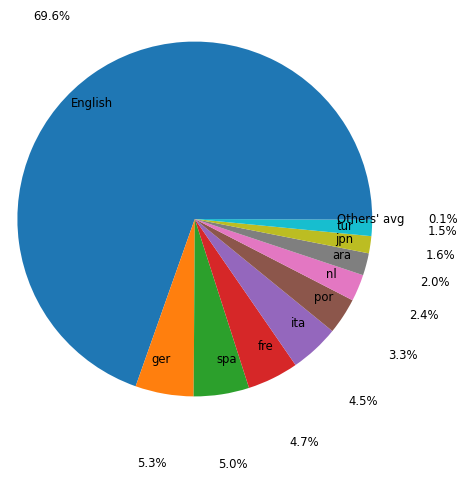

In [26]:
lang = df_b.groupby(['language'])[['language']].size().reset_index(name='count').sort_values( by="count",ascending=False)

N=10 
topten = lang.head(10)
others = lang.iloc[10:]

others_mean = others['count'].mean()

# Create a DataFrame for "Others"
others_df = pd.DataFrame({'language': ["Others' avg"], 'count': [others_mean]})

# Concatenate the DataFrames
combined_df = pd.concat([topten, others_df], ignore_index=True)

combined_df['count'] = combined_df['count'].apply(lambda x: x/(sum(combined_df['count'].values))) # normalized values

# Create a pie chart
labels= combined_df['language'].values
sizes = combined_df['count'].values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.4, labeldistance=.8, textprops={'size':'smaller'},radius=1.2)
plt.show()

**COMMENT**
First of all we noticed that there were three different lables to indicate the english language, so we grouped them under the same cathegory of 'English'.\
English is the most used language in our dataset, in fact we can see that the majoirty of the books are in english. The second most used language is the german one, but is evident that it is used more o less just as much as the other minority's languages.

**How many books have more than 250 pages?**


In [27]:

books = df_b[df_b['num_pages'] > 250].groupby(['num_pages'])[['num_pages']].size().reset_index(name='count')
num_books = sum(books['count'].values)
print("There are {0} books with more than 250 pages.".format(num_books))

There are 498311 books with more than 250 pages.


**result:** There are 498311 books with more than 250 pages.

**Plot the distribution of the fans count for the 50 most prolific authors (the ones
who have written more books).**

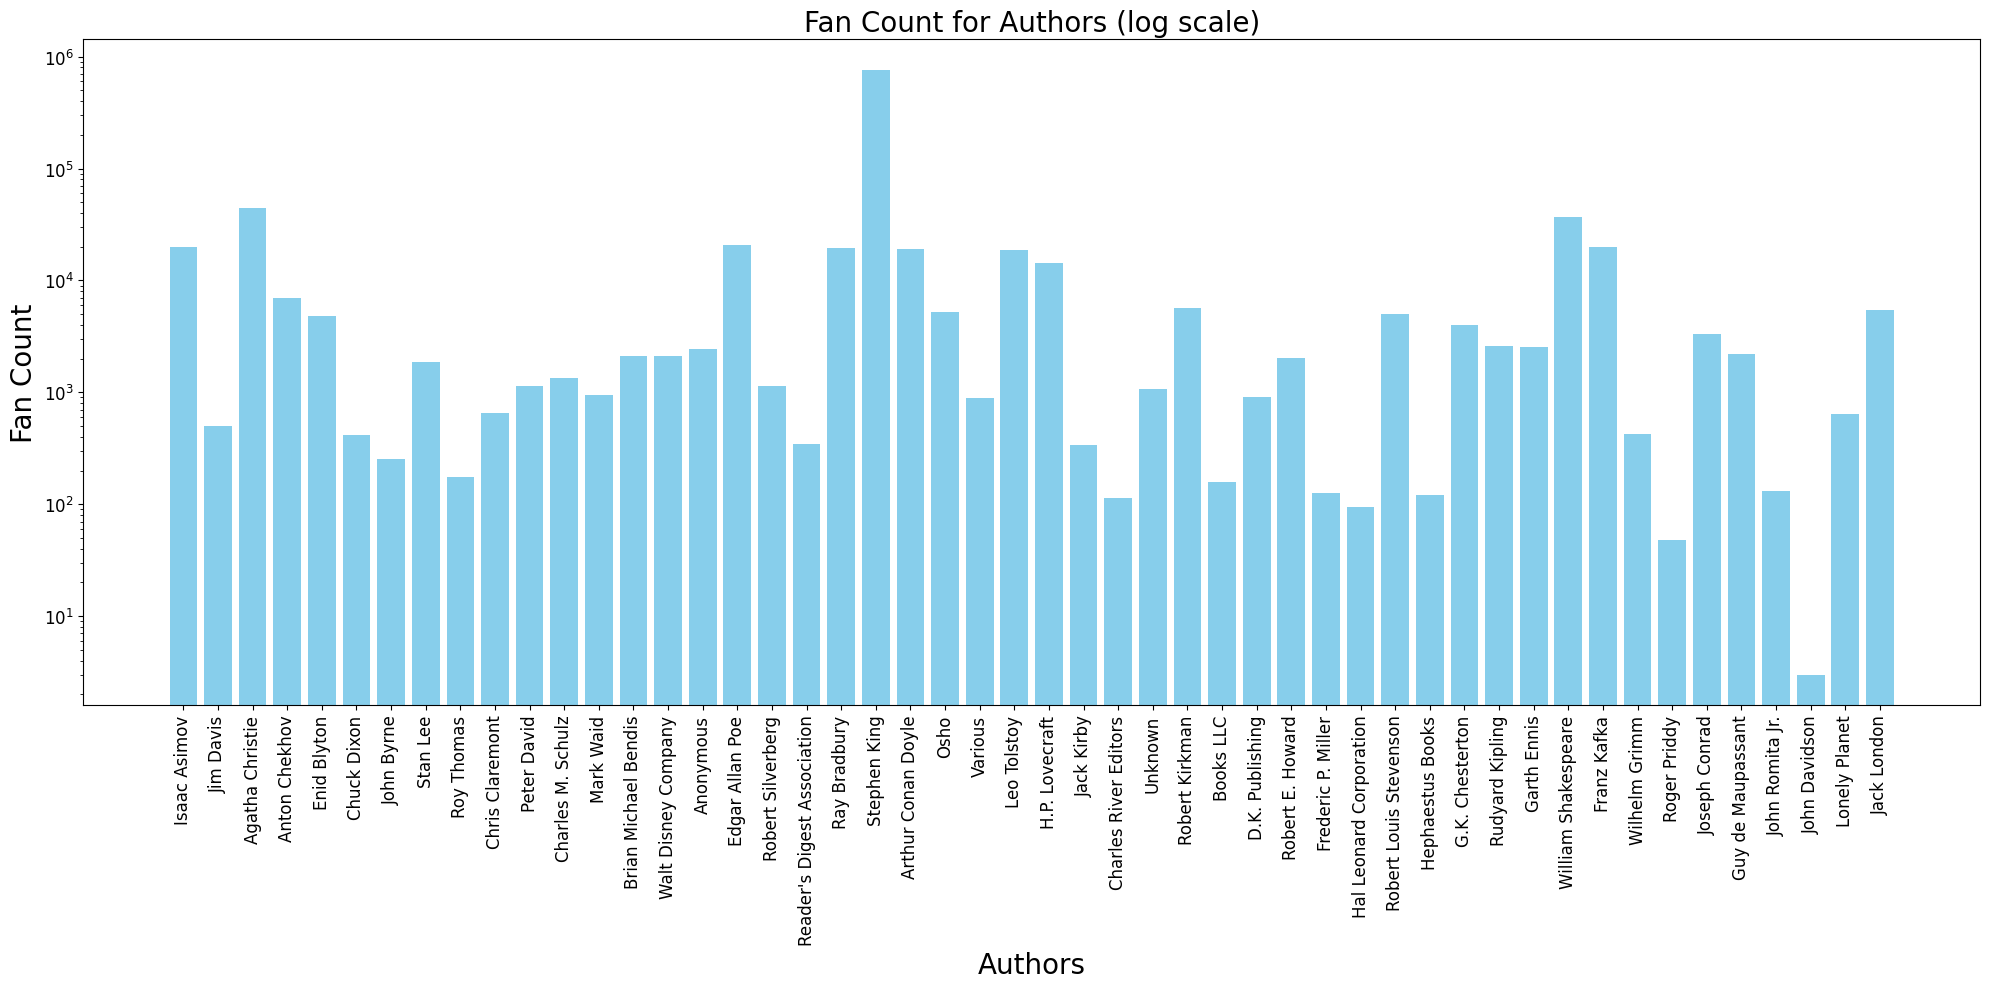

In [28]:
books_for_authors = df_a.groupby(["id"])[["fans_count","works_count","name"]].agg('sum').sort_values( by="works_count",ascending=False).head(50)

authors = books_for_authors["name"]
fan_counts = books_for_authors["fans_count"]

plt.figure(figsize=(20, 10))
plt.bar(authors, fan_counts, color='skyblue')
plt.xlabel('Authors',fontsize = 20)
plt.ylabel('Fan Count',fontsize = 20)
plt.title('Fan Count for Authors (log scale)',fontsize = 20)
plt.xticks(rotation=90, fontsize = 12) 
plt.yticks(fontsize=12)
plt.yscale('log')
plt.tight_layout()
plt.show()

As a result of the analysis, pop up authors labeled as 'Unknown', 'Various' and 'Anonymus'. Those values do not apport a significant result, but can not be deleted since represent a significant amount of data.  

## 3.[RQ3]

**Write a function that takes as input a year and returns as output the following information:**
- The number of books published that year
- The total number of pages written that year.
- The most prolific month of that year.
- The longest book written that year. 

We assume the books of different editions are considered as a different book in respect to the original, since they all are distint books, published in the specified year.  

Defined our function, for creating the requested dataframe, in the defs.py file, exploiting the previous clening we performed on the dataframe.

**Creating our data frame via the function we defined**

In [38]:
# creating my data frame for each year
years = list(set(df_b.pub_year.values))

d = {'key': years, 'Number of Books':[], 'Pages': [], 'Longest Book':[], 'Prolific month':[]}

for year in years:
    a, b, c, e = func_year(df_b, year)
    d['Number of Books'].append(a)
    d['Pages'].append(b)
    d['Longest Book'].append(c)
    d['Prolific month'].append(e)

my_df = pd.DataFrame(d, index=d['key']).sort_values(by='key', ascending=True)
my_df

,key,Number of Books,Pages,Longest Book,Prolific month
100.0,100.0,2,295.0,Βίοι Παράλληλοι: Λυκούργος - Νουμάς,January
103.0,103.0,1,284.0,Bernard Ward,January
104.0,104.0,5,2423.0,Lügat-ı Manzum (Tuhfe-i Lami'i),January
105.0,105.0,1,186.0,Anders Zorn: Unveiled,March
107.0,107.0,1,107.0,لغز عين السمكة,January
...,...,...,...,...,...
2019.0,2019.0,94,27306.0,Hopeless / Losing Hope / Finding Cinderella,August
2020.0,2020.0,59,20801.0,"The Complete Ripley Novels (Ripley, #1-5)",February
2021.0,2021.0,15,7512.0,The Navigator's Children (The Last King of Ost...,August
2022.0,2022.0,4,1280.0,Highland Ever After (The Montgomerys and Armst...,October


Show the result for the head and tail of our data frame considering the first and last 10 years

In [39]:
my_df.head(10)

,key,Number of Books,Pages,Longest Book,Prolific month
100.0,100.0,2,295.0,Βίοι Παράλληλοι: Λυκούργος - Νουμάς,January
103.0,103.0,1,284.0,Bernard Ward,January
104.0,104.0,5,2423.0,Lügat-ı Manzum (Tuhfe-i Lami'i),January
105.0,105.0,1,186.0,Anders Zorn: Unveiled,March
107.0,107.0,1,107.0,لغز عين السمكة,January
108.0,108.0,2,2089.0,Kouwe kermis,January
110.0,110.0,2,220.0,Breath of India: 4 Friends On a Spiritual Pilg...,August
120.0,120.0,1,337.0,"Vite parallele: Nicia, Crasso",January
124.0,124.0,1,124.0,Mẹ: biểu hiện của tình thương,January
125.0,125.0,1,1977.0,Begin and Co. as They Really are: An Anthology,January


In [40]:
my_df.tail(10)

,key,Number of Books,Pages,Longest Book,Prolific month
2014.0,2014.0,96981,23536699.0,"A Most Unlikely Countess (To Love a Wildcat, #2)",January
2015.0,2015.0,32824,8495695.0,Revel for the American Nation: A History of th...,January
2016.0,2016.0,1470,483385.0,Homestuck,January
2017.0,2017.0,365,117384.0,The Starfarers Quartet,February
2018.0,2018.0,148,58756.0,地海六部曲,March
2019.0,2019.0,94,27306.0,Hopeless / Losing Hope / Finding Cinderella,August
2020.0,2020.0,59,20801.0,"The Complete Ripley Novels (Ripley, #1-5)",February
2021.0,2021.0,15,7512.0,The Navigator's Children (The Last King of Ost...,August
2022.0,2022.0,4,1280.0,Highland Ever After (The Montgomerys and Armst...,October
2023.0,2023.0,1,463.0,Apocalypse,September


**ChatGPT implementation**\
We asked chatGPT the following question: I want to create a function in python that takes in input a dataframe and a year, and returns: the  number of books published that year, the total number of pages written that year, the month where the most books have been published that year and the longhest book written that year. the dataframe in input has these columns:['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'ratings_count', 'publication_date', 'original_publication_date', 'edition_information', 'num_pages']. Then create a data frame out of this function, for every year in the original data frame up until 2023. \
\
The following was its answer:

In [16]:

def analyze_books_by_year(dataframe, year):
    # Filter out rows with invalid publication_date values
    valid_rows = dataframe['original_publication_date'].apply(lambda x: str(x).isdigit())
    year_df = dataframe[valid_rows]

    # Convert years to integers
    year_df['publication_year'] = year_df['original_publication_date'].astype(int)
    year_df = year_df[year_df['publication_year'] == year]

    num_books_published = year_df.shape[0]
    total_pages_written = year_df['num_pages'].sum()

    # Find the month with the most books published
    if not year_df.empty:
        year_df['original_publication_date'] = pd.to_datetime(year_df['publication_year'], format='%Y')
        most_books_month = year_df['original_publication_date'].dt.month.value_counts().idxmax()
    else:
        most_books_month = None

    # Find the longest book written
    longest_book = year_df['num_pages'].idxmax()
    longest_book_title = year_df.loc[longest_book, 'title']

    return {
        'Year': year,
        'Number of Books Published': num_books_published,
        'Total Pages Written': total_pages_written,
        'Month with Most Books Published': most_books_month,
        'Longest Book Title': longest_book_title
    }

# Create an empty list to store DataFrames for each year
result_dfs = []

# Get the minimum and maximum years in the DataFrame
min_year = df_b['original_publication_date'].min()
max_year = 2023

# Loop through each year and create DataFrames
for year in range(int(min_year), max_year + 1):
    result = analyze_books_by_year(df_b, year)
    result_dfs.append(result)

# Convert the list of dictionaries into a DataFrame
final_result_df = pd.DataFrame(result_dfs)

# Set the 'Year' column as the index
final_result_df.set_index('Year', inplace=True)

# Print the resulting DataFrame
print(final_result_df)

ValueError: invalid literal for int() with base 10: '100-01-01'

Although we tried multiple times to adjust the code, trying to explain to the chat tool the errors it arised and the structure of the values inside the pubblication data, it seems not to understand how to solve the problem.\
This leads to the conclusio that, for highly-structured problems, where the disomogenity of data rules, an AI tool do not perform as a human would to solve the problem. 

## 4.[RQ4]

**Be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?**

In [41]:
epo = df_a.groupby(['name']).agg(names_occurency=pd.NamedAgg(column='name', aggfunc='count')).sort_values(by= 'names_occurency',ascending=False ) 
n = epo[epo.names_occurency >1] 

lista_nomi = n.index
indici_nomi = df_a[df_a['name'].apply(lambda x: x in lista_nomi)].index

nome_id = df_a.loc[indici_nomi].apply(lambda row: (row['name'], row['id']), axis=1).values
eponym = [] # the list contains the names of authors with same name but different id 
d = {} # the dictionary is needed to check which id corresponds to a name and vice versa
for nome, id in nome_id:
    if nome in d.keys():
        if id != d[nome]:
            eponym.append(nome)
    else:
        d[nome] = id

print('There are {0} authors that are eponymous'.format(len(eponym)))

There are 21714 authors that are eponymous


No, it's not true, there are authors that have the same name but different id.

**Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.**

In order to do that, we created a function that takes in input not only the list of autor's ids, but has to be given also the dataframe it is going to work on , the name of the column where the id is stored and the name of the column where the titles are stored.\
The function 'dictionary_for_authors' is defined in the defs.py file.

**What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?**

We created a function 'find_longest_title' in the files defs.py

In [43]:
top_20_auth = df_a.groupby(['id'])[['id','average_rating']].agg('sum').sort_values(by= 'average_rating', ascending= False).head(20)

d_20 = dictionary_for_authors(df=df_b, col_id='author_id', col_title='title', list_of_auth = top_20_auth['id'].values)
longest = find_longest_title(d_20.values())
print("'{0}' is the longest book title among the top 20 authors for their average rating".format(longest))

longer_overall = df_b[df_b['title'].str.len() > len(longest)]

if longer_overall.empty :
    print("'{0}' is the longest book overall".format(longest))
else:
    print("'{0}' is not the longest book overall".format(longest))

'Stories from Hadraemscapen (Birth of a New Dawn #1, A Time of Hope #2, Darkness Settles #3)' is the longest book title among the top 20 authors for their average rating
'Stories from Hadraemscapen (Birth of a New Dawn #1, A Time of Hope #2, Darkness Settles #3)' is not the longest book overall


**What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer**

In [44]:
shortest_books = df_b[df_b['title'].str.len() ==1 ]
shortest_books

,id,title,author_name,author_id,work_id,language,average_rating,ratings_count,text_reviews_count,publication_date,original_publication_date,num_pages,pub_year,pub_month
196707,399780,K,Daniel Easterman,71071,389214,fre,3.63,128,12,2000-03-02,1997-01-01,500.0,1997.0,01
390233,881099,V,Thomas Pynchon,235,2999000,English,3.96,19113,1041,,1963-08-01,492.0,1963.0,08
391584,884001,M,Anton Kaes,375543,869272,English,3.95,86,8,2000-02-26,2000-02-26,96.0,2000.0,02
1159373,3334380,K,Daniel Easterman,71071,389214,fre,3.63,128,12,2006-12-07,1997-01-01,499.0,1997.0,01
1400086,4912955,٧,Ghazi A. Algosaibi,14053959,4978497,ara,3.84,2023,271,2003,1998-02-01,336.0,1998.0,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950925,25421142,X,J.J. Connolly,17914123,29877,fre,3.99,1519,105,2015-04-09,2000-04-06,439.0,2000.0,04
6950927,25421147,X,J.J. Connolly,17914123,29877,fre,3.99,1519,105,2015-04-09,2000-04-06,439.0,2000.0,04
6960610,25446783,X,Ilyasah Shabazz,363368,41679264,English,3.89,2658,605,2015,2015-01-06,385.0,2015.0,01
6975090,25484953,C,Tom McCarthy,30757,9540419,tur,3.16,3324,504,2015-05,2010-08-05,445.0,2010.0,08


We can't  really say which book is the shortest, since there are many with the same number of charachters; but we can notice that there are books with only one letter as their title.\
In order to provide a meaningfull answer, we checked if those books actually existed, and the answer is positive; So we can state that there is more than just one book with a single letter as its title, and for this reason we can't provide a uniqe answer.\
What we can provide, though, are all the shortest books: all the ones that have one characther in their name.

## 5.[RQ5]

We're now creating another dataframe for the books file, since now we need different attributes.

In [ ]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [ ]:
# Reading authors.json database

chunks = pd.read_json('/content/drive/MyDrive/ADM_HW2/lighter_authors.json', lines=True, chunksize=10000)
df_authors = []
for c in chunks:
    c = c.drop(['work_ids'], axis = 1)
    c = c.drop(['book_ids'], axis = 1)
    c = c.drop(['id'], axis = 1)
    c = c.drop(['image_url'], axis = 1)
    c = c.drop(['about'], axis = 1)
    df_authors.append(c)
df_authors = pd.concat(df_authors, ignore_index=True)

In [8]:
# General data cleaning for df_authors

df_authors.loc[:, 'ratings_count'] = df_authors['ratings_count'].apply(lambda x: np.nan if x <0 else x )   #taking care of negative values
df_authors.loc[:, 'average_rating'] = df_authors['average_rating'].apply(lambda x: np.nan if x<0 else x)   #taking care of negative values
df_authors.loc[:,'fans_count'] = df_authors['fans_count'].apply(lambda x: np.nan if x<0 else x)            #taking care of negative values
df_authors = df_authors[df_authors.name != 'NOT A BOOK']
df_authors['name'] = df_authors['name'].str.replace(r'\s+', ' ', regex=True)

In [13]:
# Reading books.json database
path_b = "D:\Primo Semestre\ADM\HW2\lighter_books.json"
chunks = pd.read_json(path_b, lines=True, chunksize=10000)
df_books = []
for c in chunks:
    c = c.drop(['authors'], axis = 1)
    c = c.drop(['author_id'], axis = 1)
    c = c.drop(['work_id'], axis = 1)
    c = c.drop(['isbn'], axis = 1)
    c = c.drop(['isbn13'], axis = 1)
    c = c.drop(['asin'], axis = 1)
    c = c.drop(['language'], axis = 1)
    c = c.drop(['image_url'], axis = 1)
    c = c.drop(['edition_information'], axis = 1)
    c = c.drop(['publisher'], axis = 1)
    c = c.drop(['series_position'], axis = 1)
    c = c.drop(['shelves'], axis = 1)
    c = c.drop(['description'], axis = 1)
    c = c[c.author_name != 'NOT A BOOK']
    df_books.append(c)
df_books = pd.concat(df_books, ignore_index=True)

In [14]:
# General data cleaning for df_books

to_drop=['','Select...', '--']
df_books['author_name'] = df_books['author_name'].str.replace(r'\s+', ' ', regex=True)
df_books.loc[:, 'original_publication_date'] = df_books['original_publication_date'].apply(lambda x: np.nan if x in to_drop else x)

# RQ5-1

The most influential author is:  Stephen King


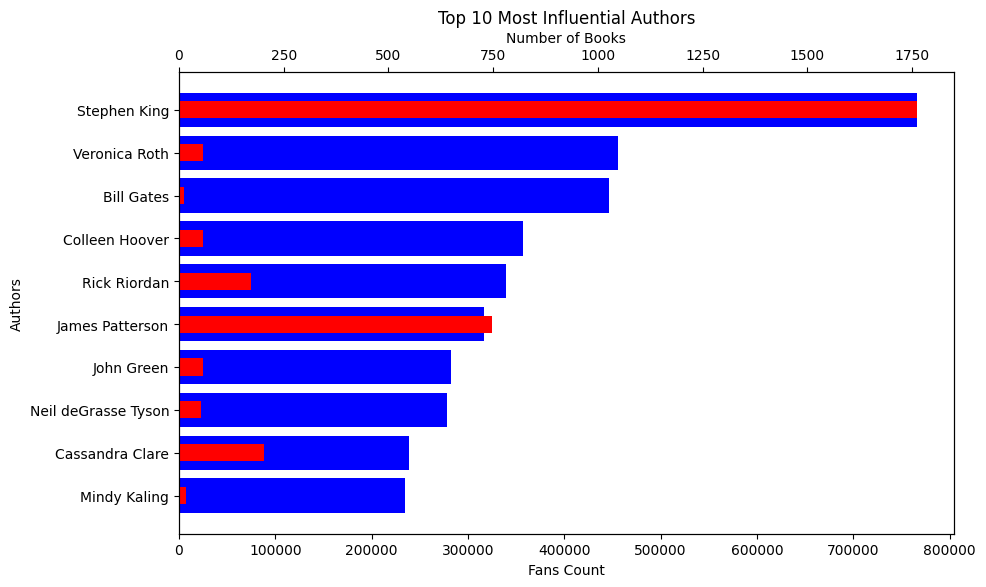

In [15]:
# Groupby function is much slower than nlatrgest
# authors_sample.groupby(['fans_count','works_count']).max().tail(10)
# authors_sample.sort_values(by=['fans_count', 'works_count'], ascending=False).head(10)

# Sort the DataFrame by fan count and number of books, then select the top 10 rows
top_10_authors = df_authors.nlargest(10, ['fans_count', 'works_count'])

print('The most influential author is: ',top_10_authors['name'].iloc[0])

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot fan count on the first y-axis
ax1.barh(top_10_authors['name'], top_10_authors['fans_count'], color='blue', label='Fans Count')
ax1.set_xlabel('Fans Count')
ax1.set_ylabel('Authors')

# Create a second y-axis to plot the number of books
ax2 = ax1.twiny()
ax2.barh(top_10_authors['name'], top_10_authors['works_count'], color='red', label='Number of Books', height=0.4)
ax2.set_xlabel('Number of Books')

plt.title('Top 10 Most Influential Authors')
plt.gca().invert_yaxis()  # Invert y-axis to display the author with the highest counts at the top
plt.show()

# RQ5-2

In [16]:
# Find the top ten authors' books
top_10_authors_books = df_books[df_books['author_name'].isin(top_10_authors['name'])]

# Keeping the authors who published series of books
top_10_authors_series_name = top_10_authors_books['series_name'][top_10_authors_books["series_id"] != '']

# Find the longest series name among the top 10 most influential authors
longest_series_name = top_10_authors_series_name.loc[top_10_authors_series_name.apply(len).idxmax()]

print('The longest series name among the most influential authors is: ',longest_series_name)

The longest series name among the most influential authors is:  Percy Jackson and the Olympians: The Graphic Novels


Since the question asked for the longest string, it is not necessary to go through the cleaning process of the 'series_name' column.

# RQ5-3

The authors who have published in more than one format are: Audiobook,Ebook,Hardcover,Paperback,Unknown


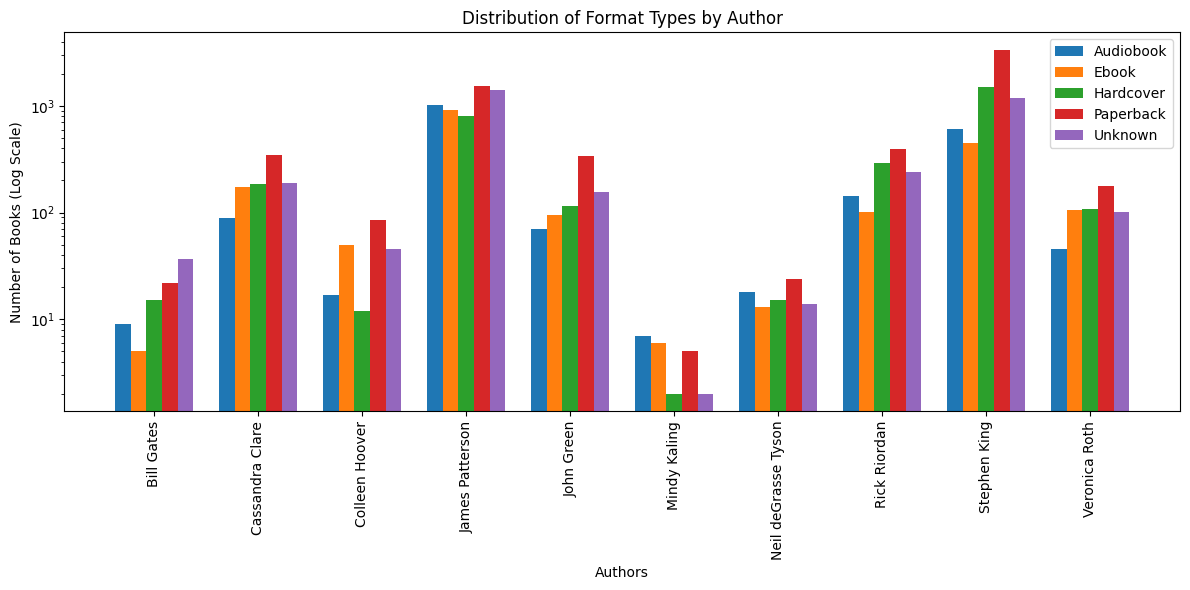

In [17]:
# Data in book['format'] needs a cleaning process
format_values = top_10_authors_books['format'].unique()
#77 format types, and this is only for the top 10 authors!!! I can see the TAs' footprint here :))), mostly spanish and couple of french & persian values

# Apply the categorize_format function to the 'format' column of top_10_authors_books dataframe. I could apply it on the df_author, but it was demanding (a.k.a expensive, not cost effective?!!) also not necessary
top_10_authors_books.loc[:,'format_category'] = top_10_authors_books.loc[:,'format'].apply(categorize_format)

# I did the below line for the five values defined in 'format_category' column to double check the cleaning process
# top_10_authors_books[top_10_authors_books['format_category'] == 'Audiobook']['format'].unique()

# Grouping the authors by their publish formats
multiple_format_authors = top_10_authors_books[['id','author_name', 'format_category']].pivot_table(
    index='author_name', columns= 'format_category', fill_value=0, aggfunc='count')

# Filter the authors who had more than one publish format
# multiple_format_authors = multiple_format_authors[multiple_format_authors.columns[multiple_format_authors.sum()>1]]
# I can see that this line is actually not needed since the sum of each column (a.k.a total number of an author publishments) is larger than 1
# which means?!

# Drop multi-indexing
multiple_format_authors = multiple_format_authors.reset_index(col_level=1).droplevel(level=0,axis=1)
print('The authors who have published in more than one format are:',','.join(multiple_format_authors.columns[1:]))

# Set the positions and width for the bars
positions = range(len(multiple_format_authors))
bar_width = 0.15

# Plotting using a for loop with grouped bars and logarithmic y-axis scale which helps in
# visualizing the data more clearly when there are large differences in values between categories

plt.figure(figsize=(12, 6))
for i, format_type in enumerate(multiple_format_authors.columns[1:]):
    plt.bar([pos + i * bar_width for pos in positions], multiple_format_authors[format_type], bar_width, label=format_type)

plt.xlabel('Authors')
plt.ylabel('Number of Books (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Distribution of Format Types by Author')
plt.xticks([pos + 2 * bar_width for pos in positions], multiple_format_authors['author_name'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

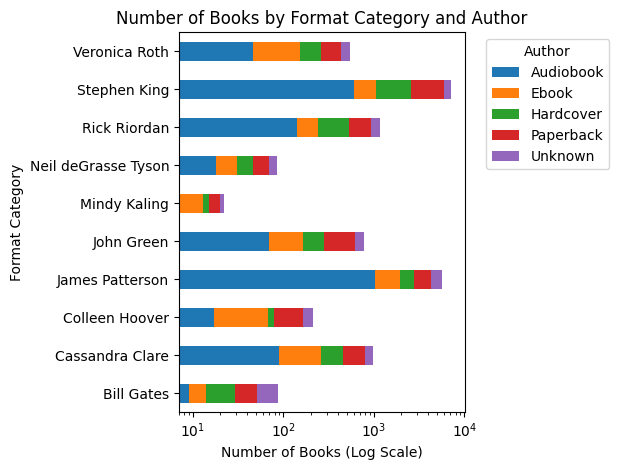

In [18]:
# Horizontal barplot can also help to visualize the distribution of book format types for each author
# Set the format categories as the index
multiple_format_authors.set_index('author_name', inplace=True)

# Create a horizontal bar chart with a logarithmic scale since there are huge disparities between the values
plt.figure(figsize=(10, 8))
ax = multiple_format_authors.plot(kind='barh', stacked=True, logx=True)

# I tried this chart with normalized data using Min-Max normalization and the result was not readable
# normalized_df = (multiple_format_authors - multiple_format_authors.min()) / (multiple_format_authors.max() - multiple_format_authors.min())

plt.xlabel('Number of Books (Log Scale)')
plt.ylabel('Format Category')
plt.title('Number of Books by Format Category and Author')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

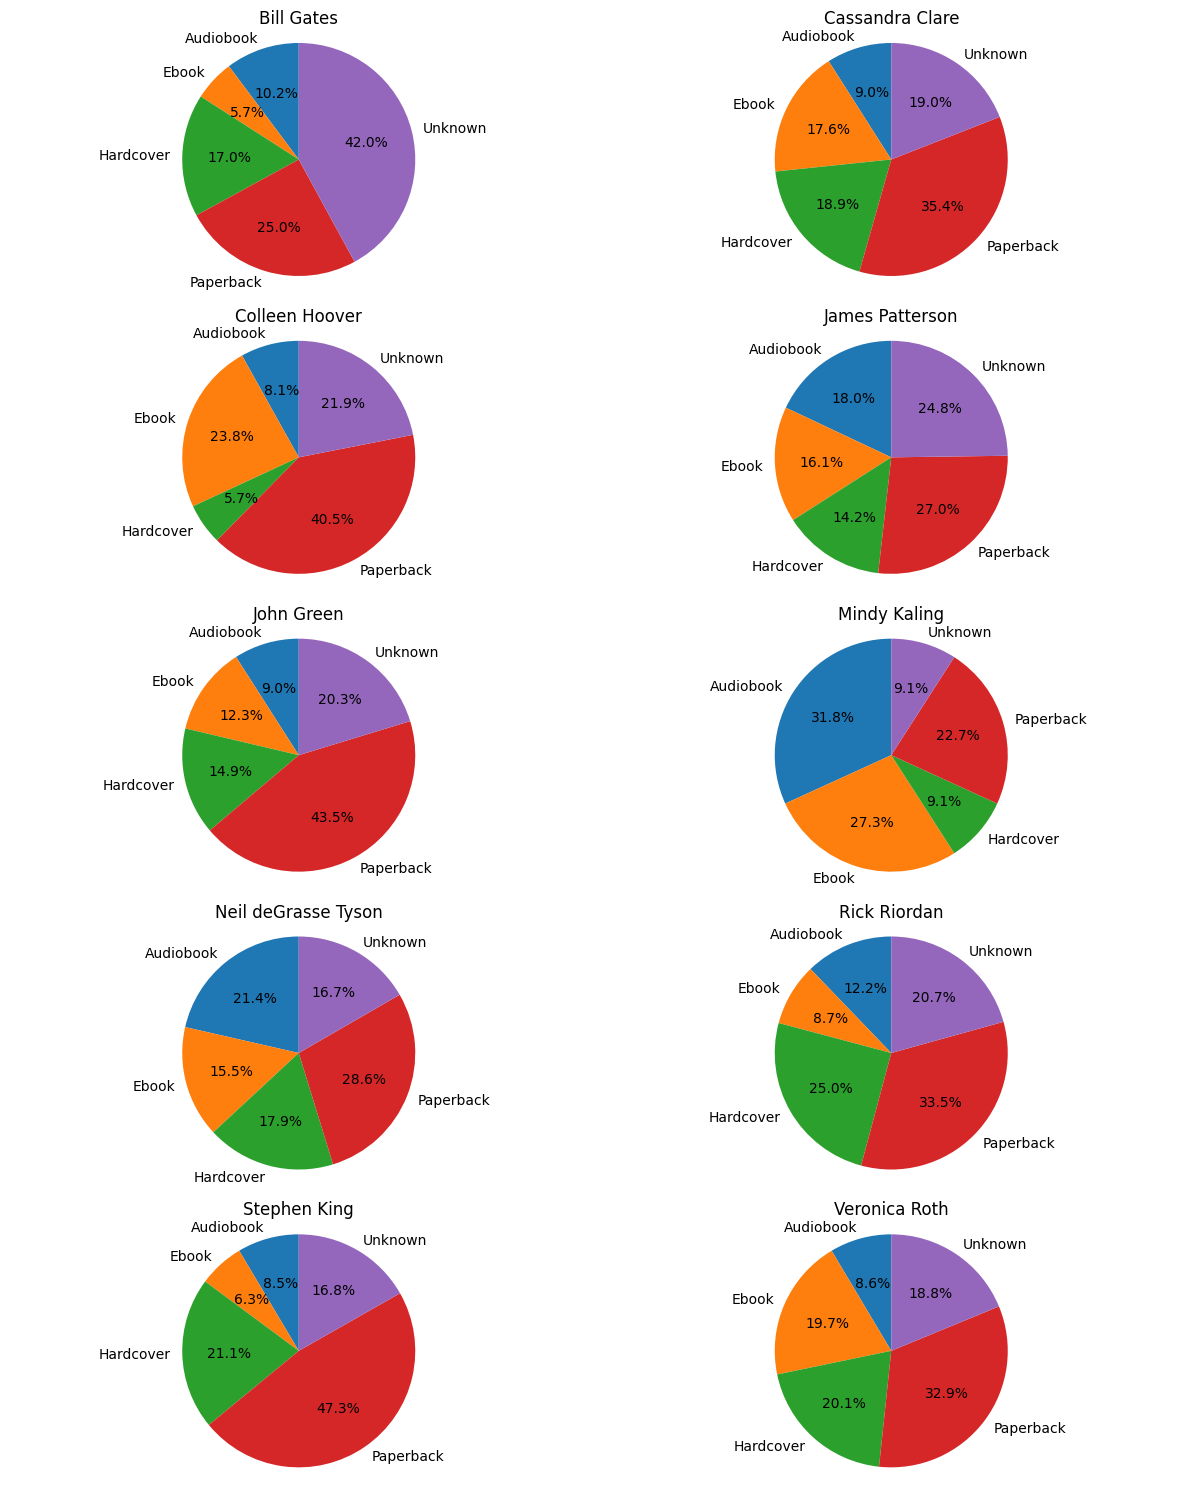

In [51]:
# Piecharts can also give a nice vision for comparing the distribution of format types among these authors
# Set the figure size and create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
fig.subplots_adjust(hspace=0.5)

# Iterate through authors and create pie charts
for i, ax in enumerate(axs.flat):
    author_data = multiple_format_authors.iloc[i]
    formats = author_data.index[1:]
    values = author_data.values[1:]
    ax.pie(values, labels=formats, autopct='%1.1f%%', startangle=90)
    ax.set_title(author_data['author_name'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.tight_layout()
plt.show()

# RQ5-4

<ipython-input-80-fc93467cd5b3>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(structural_bias["cleaned_gender"], rotation=90, ha='right')


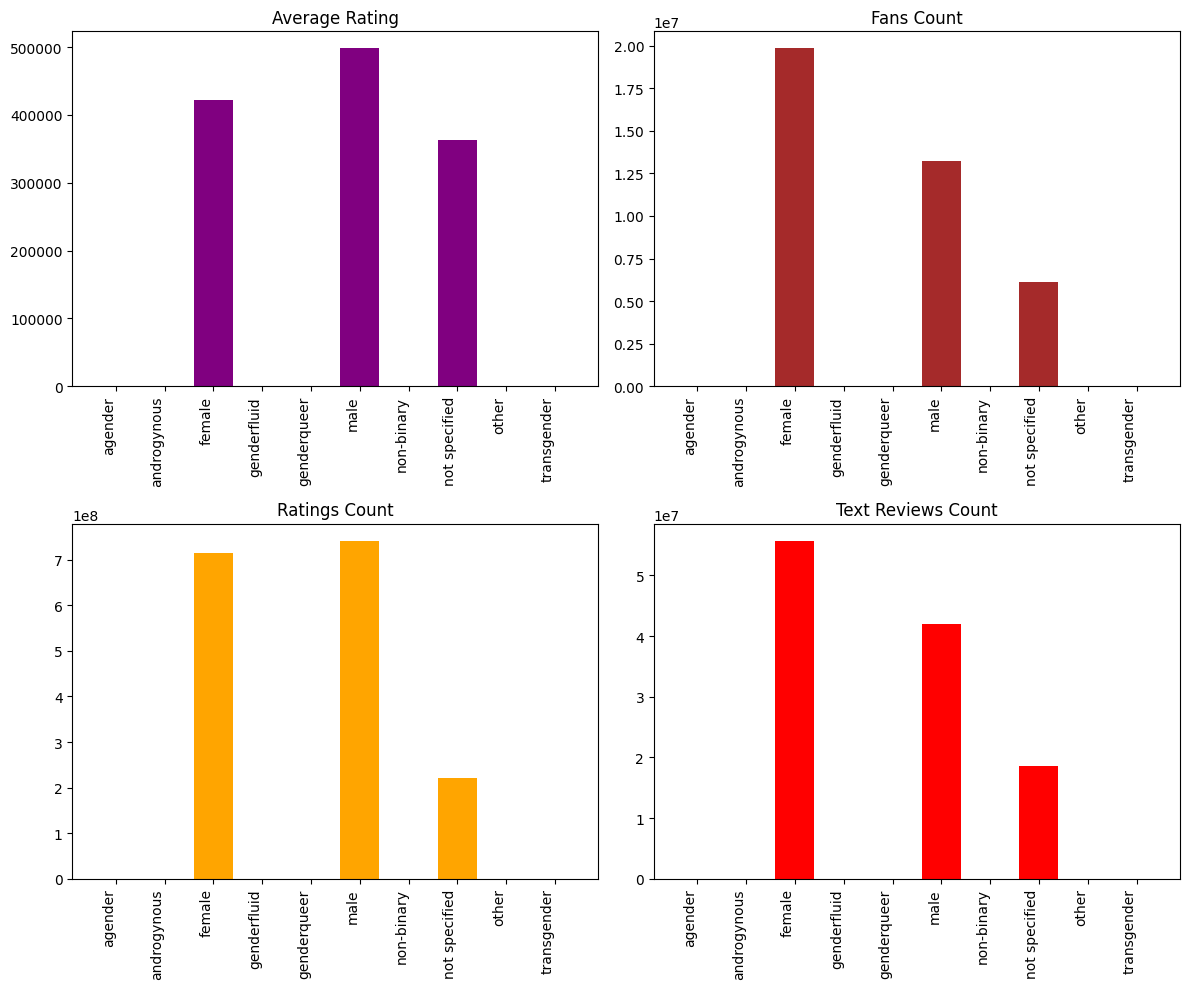

In [ ]:
# Data in author['gender'] needs a cleaning process
gender_values = df_authors['gender'].unique()  #150 gender types!!!

# Apply the clean_gender function to the 'gender' column
df_authors['cleaned_gender'] = df_authors['gender'].map(lambda x: clean_gender(x))

# Extracting data about the general response from readers based on the authors gender
structural_bias = df_authors[['ratings_count', 'average_rating', 'text_reviews_count'
                                  , 'cleaned_gender', 'fans_count']].pivot_table(index='cleaned_gender', aggfunc=[np.sum])

# Drop multi-indexing
structural_bias = structural_bias.droplevel(level=0,axis=1).reset_index().rename(columns={"index": "mean_response"})

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(structural_bias["cleaned_gender"], structural_bias["average_rating"], color='purple')
axs[0, 0].set_title('Average Rating')

axs[0, 1].bar(structural_bias["cleaned_gender"], structural_bias["fans_count"], color='brown')
axs[0, 1].set_title('Fans Count')

axs[1, 0].bar(structural_bias["cleaned_gender"], structural_bias["ratings_count"], color='orange')
axs[1, 0].set_title('Ratings Count')

axs[1, 1].bar(structural_bias["cleaned_gender"], structural_bias["text_reviews_count"], color='red')
axs[1, 1].set_title('Text Reviews Count')

for ax in axs.flat:
    ax.set_xticklabels(structural_bias["cleaned_gender"], rotation=90, ha='right')

plt.tight_layout()
plt.show()

Overall, it is obviouse that the male, female, and not specified gender authors got the highest number of ratings, reviews, fan counts.

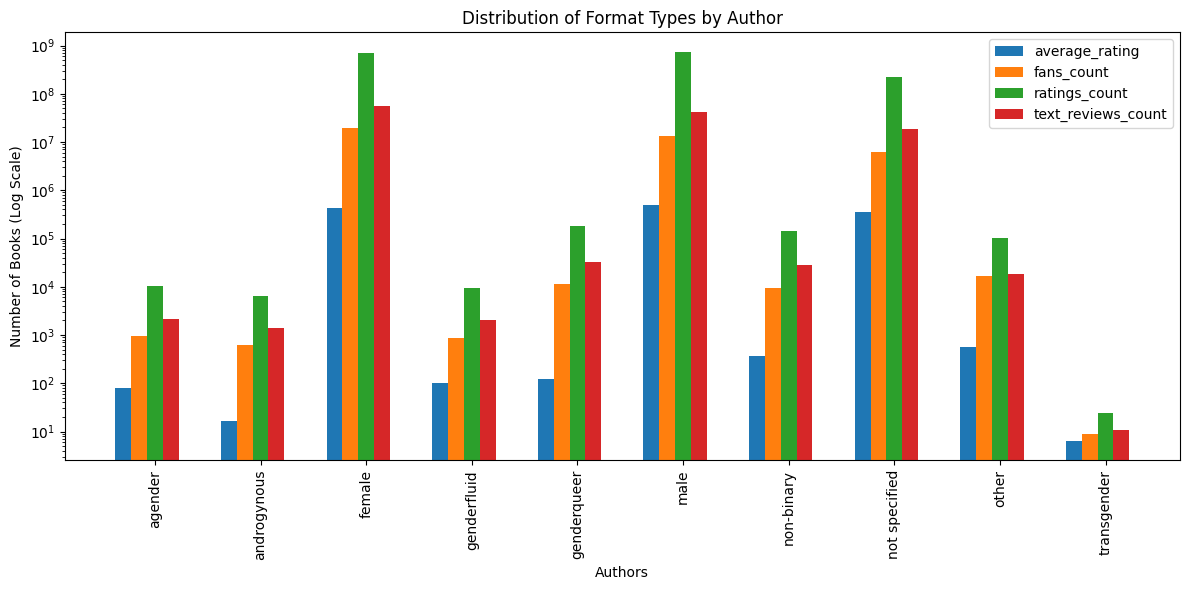

In [21]:
# Set the positions and width for the bars
positions = range(len(structural_bias))
bar_width = 0.15

# Plotting using a for loop with grouped bars and logarithmic y-axis scale which helps in
# visualizing the data more clearly when there are large differences in values between categories

plt.figure(figsize=(12, 6))
for i, gender_type in enumerate(structural_bias.columns[1:]):
    plt.bar([pos + i * bar_width for pos in positions], structural_bias[gender_type], bar_width, label=gender_type)

plt.xlabel('Authors')
plt.ylabel('Number of Books (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Distribution of Format Types by Author')
plt.xticks([pos + 2 * bar_width for pos in positions], structural_bias['cleaned_gender'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Even plotting the data with logarithmic scale for the sake of normalization, we can see a significant disparity(higher values) between average rating, ratings count, fans count, and reviews count for male and female authors in comparison to other above mentioned gender types.

We gave ChatGPT the data sample and asked it to 'Provides helpful information (visual and statistics) about the general response from readers according to the authors' gender types'. Here are the answers it provided:

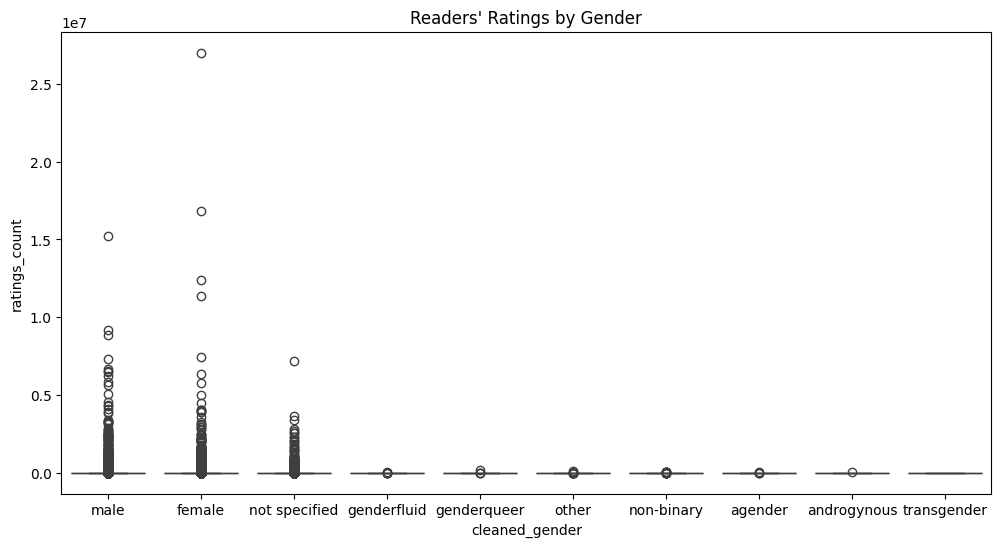

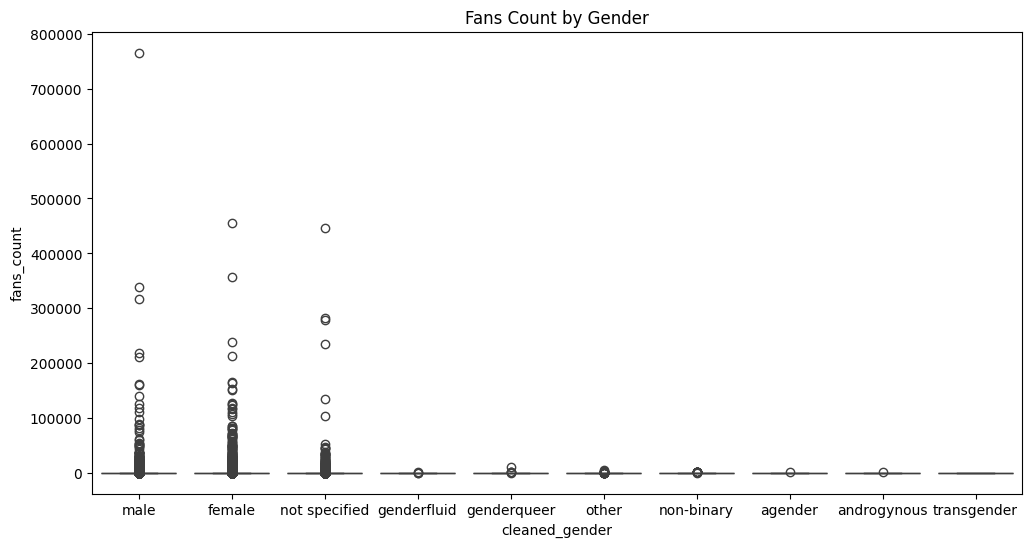

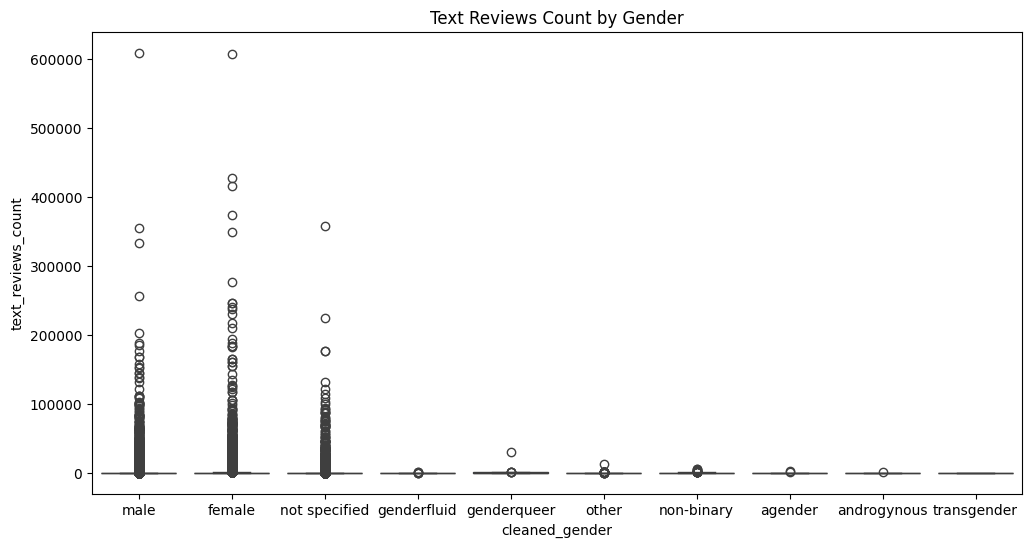

In [22]:
# Visualizations

# Box plot for ratings_count, fans_count, and text_reviews_count grouped by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='cleaned_gender', y='ratings_count', data=df_authors)
plt.title('Readers\' Ratings by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cleaned_gender', y='fans_count', data=df_authors)
plt.title('Fans Count by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cleaned_gender', y='text_reviews_count', data=df_authors)
plt.title('Text Reviews Count by Gender')
plt.show()

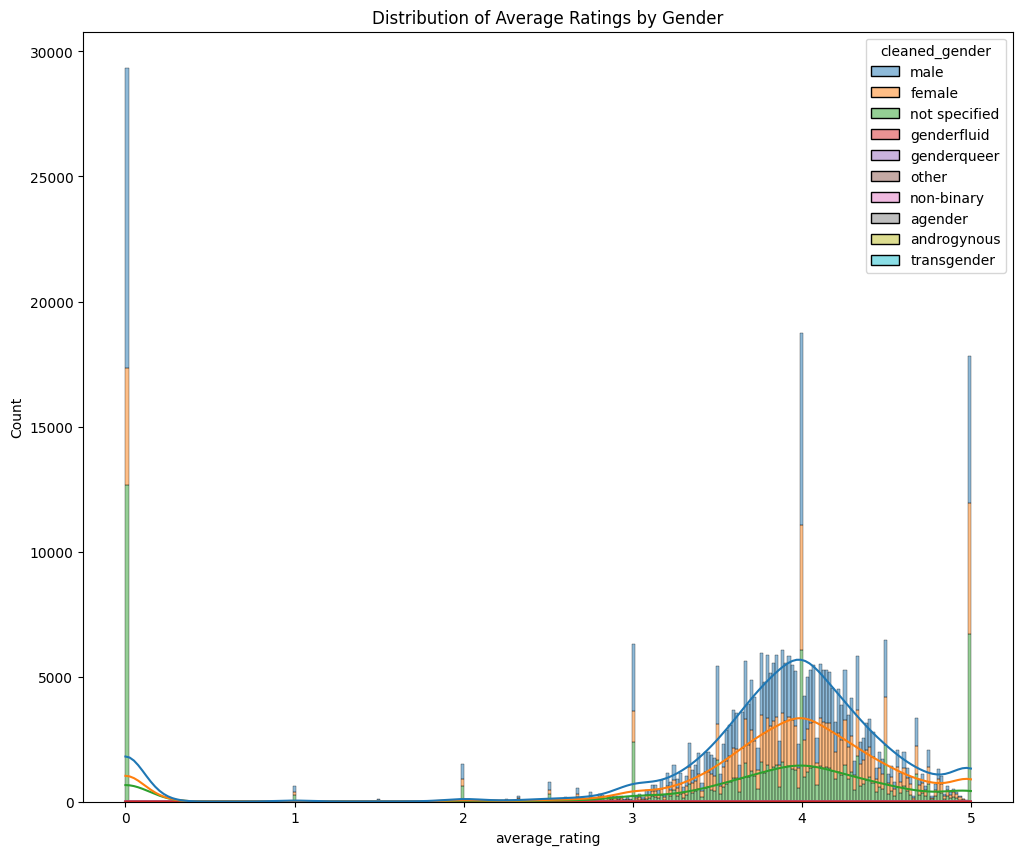

In [23]:
# Histogram for average_rating grouped by gender
plt.figure(figsize=(12, 10))
sns.histplot(data=df_authors, x='average_rating', hue='cleaned_gender', multiple="stack", kde=True)
plt.title('Distribution of Average Ratings by Gender')
plt.show()

In [24]:
# Statistics

# Summary statistics for each gender group
summary_stats = df_authors.groupby('cleaned_gender').describe()
print(summary_stats)

               ratings_count                                                \
                       count         mean            std  min   25%    50%   
cleaned_gender                                                               
agender                 19.0   549.368421    1648.996739  2.0   4.5   13.0   
androgynous              5.0  1259.600000    2775.795526  0.0   5.0   25.0   
female              109884.0  6500.418924  131605.103535  0.0  12.0   70.0   
genderfluid             27.0   356.222222    1449.620755  0.0   5.5   14.0   
genderqueer             31.0  5788.967742   29879.275957  0.0  19.0  132.0   
male                138181.0  5367.029157   95583.384503  0.0   6.0   40.0   
non-binary              94.0  1543.914894    5368.119920  0.0   8.0   39.5   
not specified       103374.0  2144.197255   42933.848760  0.0   3.0   21.0   
other                  145.0   692.931034    6288.630165  0.0   3.0   16.0   
transgender              2.0    12.000000      12.727922  3.0   

In [25]:
# Average ratings by gender
average_ratings_by_gender = df_authors.groupby('cleaned_gender')['average_rating'].mean()
print(average_ratings_by_gender)

cleaned_gender
agender          4.226842
androgynous      3.352000
female           3.840296
genderfluid      3.841481
genderqueer      4.001935
male             3.606694
non-binary       3.968085
not specified    3.509178
other            3.864552
transgender      3.215000
Name: average_rating, dtype: float64


The average ratings count is highest for female authors, followed by genderqueer authors and male authors. Agender and androgynous authors have lower average ratings counts compared to other genders.

The works count (number of books) is highest for male authors, followed by female authors and genderqueer authors. Agender and androgynous authors have a lower works count on average.

The fans count (number of followers) is highest for female authors, followed by genderqueer authors and male authors. Agender authors have a relatively lower fans count compared to other genders.

Overall, female authors tend to have higher ratings counts, average ratings, works count, and fans count, indicating a strong presence and engagement in the community. Agender and androgynous authors have lower engagement metrics on average, but there are exceptions, as shown by their maximum values.

# RQ6-1

In [26]:
# Apply the clean_publication_date function to the publication_date column
top_10_authors_books['cleaned_publication_date'] = top_10_authors_books['publication_date'].apply(clean_publication_date)

# Drop rows with invalid or missing dates (None values)
top_10_authors_books.dropna(subset=['cleaned_publication_date'], inplace=True)

In [38]:
# Create a column indicating whether the book belongs to a series or not
top_10_authors_books['is_series'] = np.where(top_10_authors_books['series_id'] == '', False, True)

# Calculate time gap for series books
series_books = top_10_authors_books[top_10_authors_books['is_series'] == True].sort_values(['author_name', 'series_id', 'cleaned_publication_date'])
series_time_gaps = series_books.groupby(['author_name', 'series_id'])['cleaned_publication_date'].diff()
series_books['series_time_gaps'] = series_time_gaps

# Calculate time gap for non-series books
non_series_books = top_10_authors_books[top_10_authors_books['is_series'] == False].sort_values(['author_name', 'series_id', 'cleaned_publication_date'])
non_series_time_gaps = non_series_books.groupby(['author_name', 'series_id'])['cleaned_publication_date'].diff()
non_series_books['non_series_time_gaps'] = non_series_time_gaps

# Calculate average time gap for series books
average_series_time_gap = series_books[(series_books['series_time_gaps'] != '0 days 00:00:00') & (series_books['series_time_gaps'].notnull())]['series_time_gaps'].mean()

# Calculate average time gap for non-series books
average_non_series_time_gap = non_series_books[(non_series_books['non_series_time_gaps'] != '0 days 00:00:00') & (non_series_books['non_series_time_gaps'].notnull())]['non_series_time_gaps'].mean()

print(f'Average time gap between subsequent publications for series books: {average_series_time_gap.days}','Days')
print(f'Average time gap between subsequent publications for non-series books: {average_non_series_time_gap.days}','Days')

Average time gap between subsequent publications for series books: 86 Days
Average time gap between subsequent publications for non-series books: 47 Days


We expected that publication of a series could be done in smaller time gaps since the author is more exposed to the subject and probably be able to continue their work more easily. However, the above numbers are opposite to our assumption, and non-series averagely were published within half of the time gap that it takes to publish a series book.

# RQ6-2

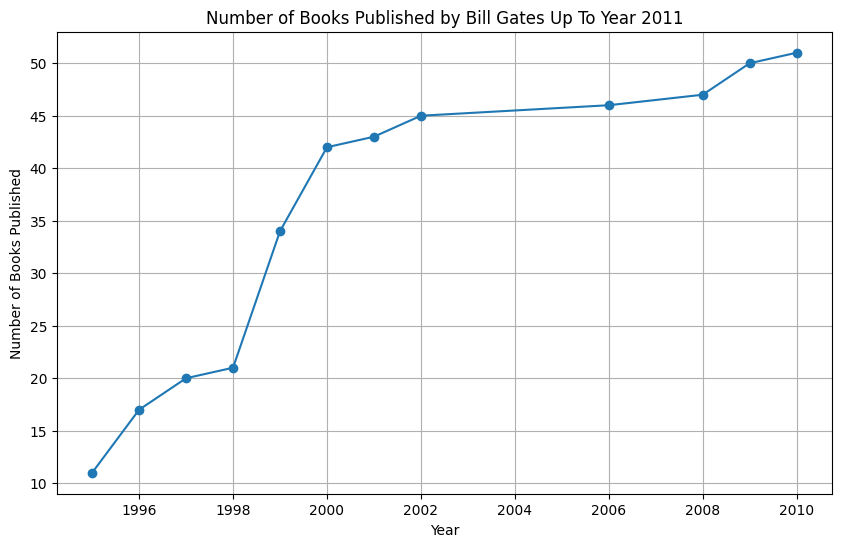

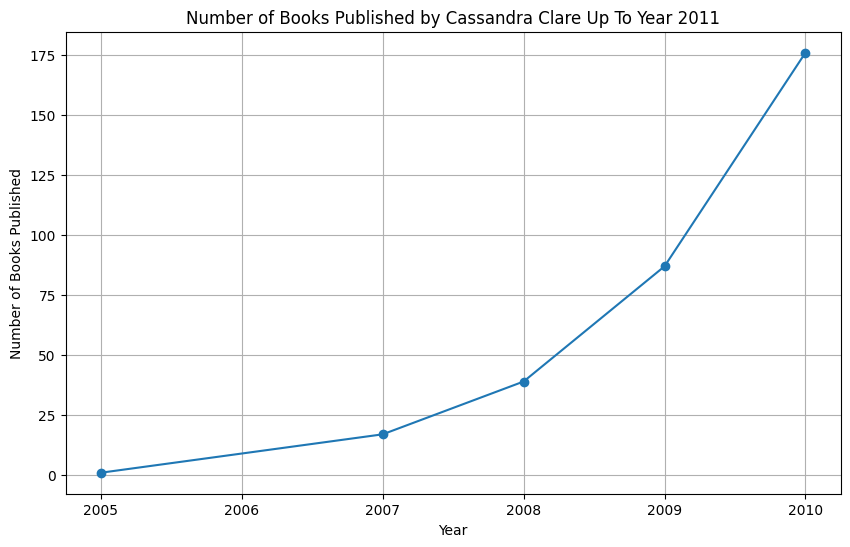

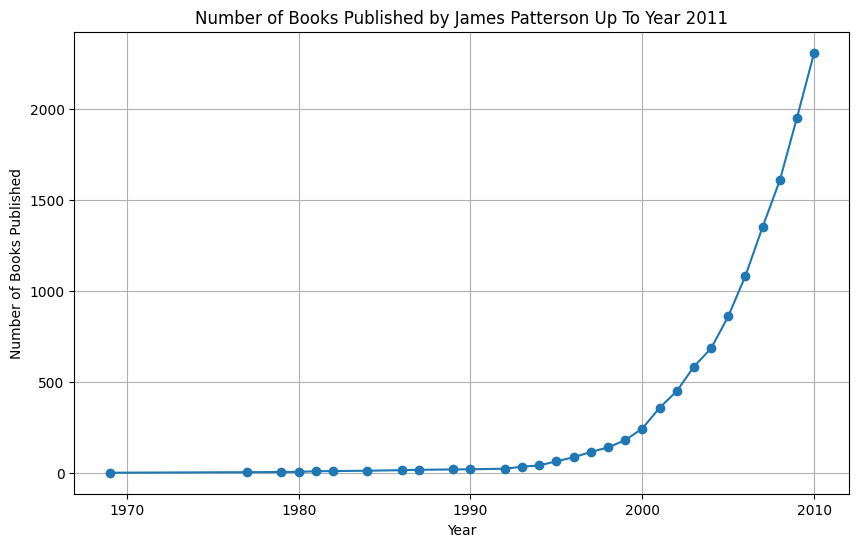

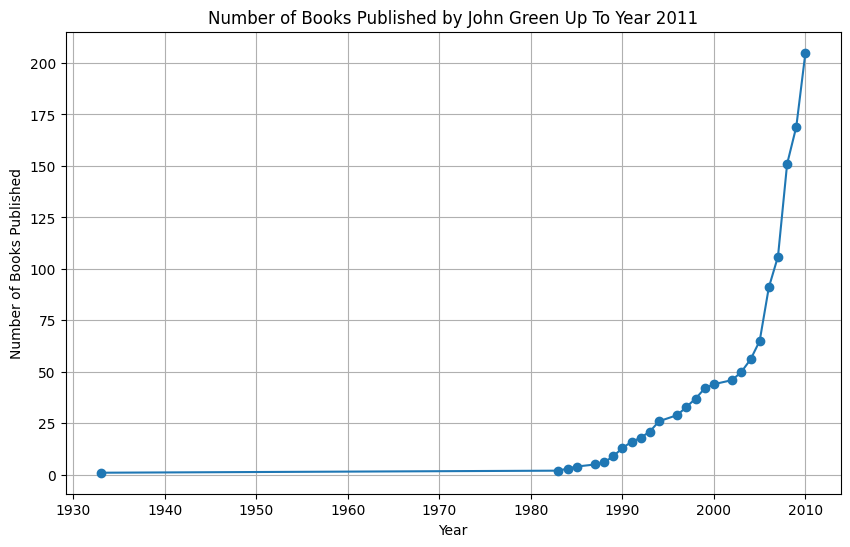

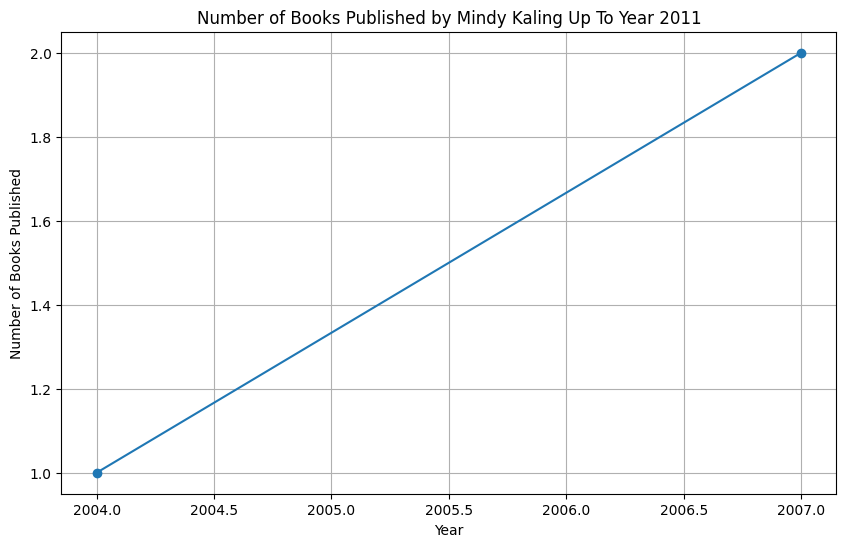

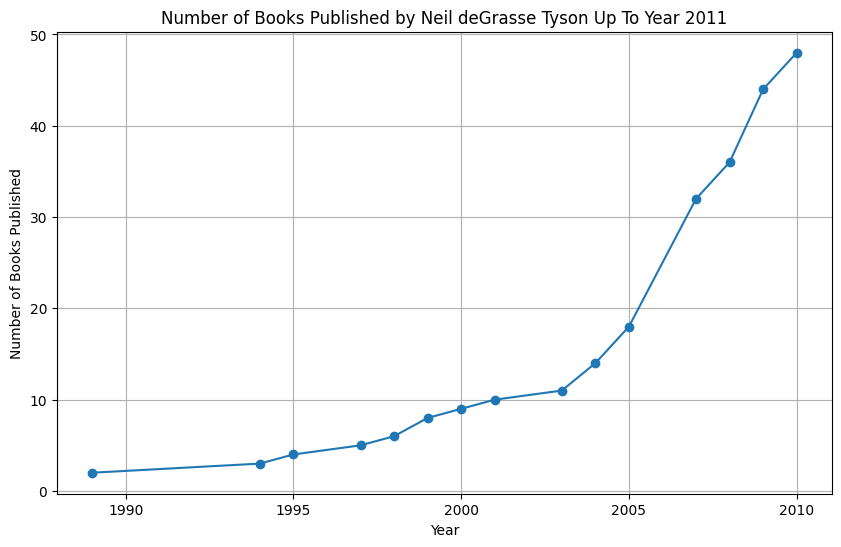

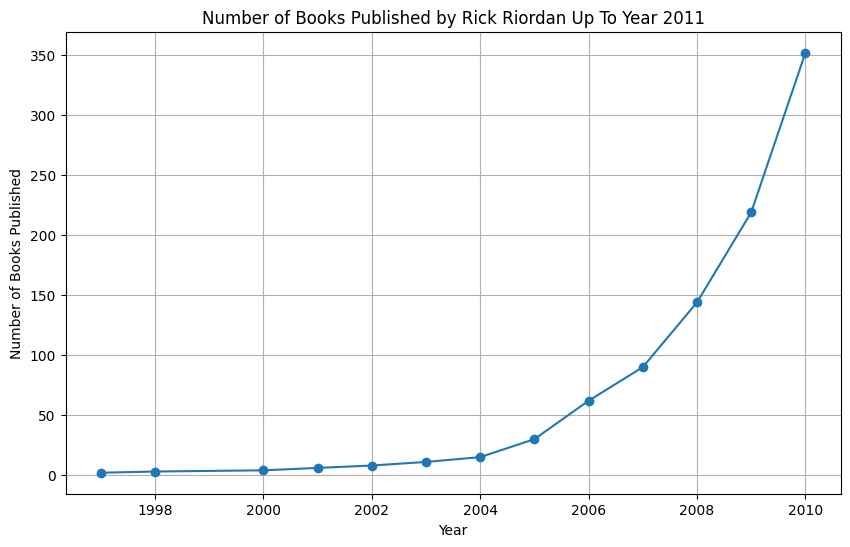

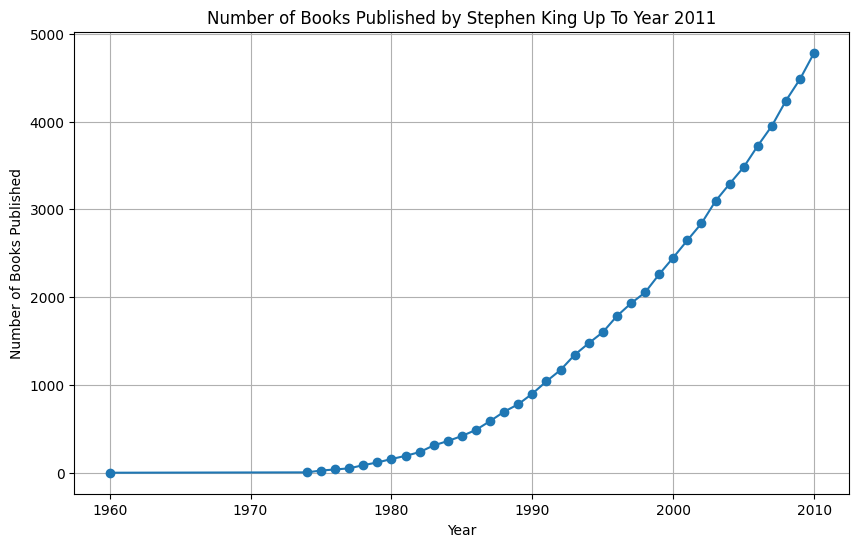

In [41]:
# Create a new column 'publication_year' to store the publication year of each book
top_10_authors_books['publication_year'] = top_10_authors_books['cleaned_publication_date'].dt.year

# Group the data by author and publication year, counting the number of books published up to year 2011
author_year_counts = top_10_authors_books[top_10_authors_books['publication_year'] < 2011].groupby(['author_name', 'publication_year']).size().groupby('author_name').cumsum().reset_index(name='num_books')

# Create a plot for each author
unique_authors = author_year_counts['author_name'].unique()

for author_name in unique_authors:
    author_data = author_year_counts[author_year_counts['author_name'] == author_name]

    plt.figure(figsize=(10, 6))
    plt.plot(author_data['publication_year'], author_data['num_books'], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Number of Books Published')
    plt.title(f'Number of Books Published by {author_name} Up To Year 2011')
    plt.grid(True)
    plt.show()


Are these authors contemporary with each other?
I chose year 2010 as the upper limit for this question since almost all of the authors had publishments until then. From the charts above, we can assume that Bill Gates, James Patterson, John Green, Neil deGrasse Tyson, Rick Riordan, and Stephen King are contemporary with each other (they all had publishments in the period between the 1980s and 2010).
Can you notice a range of years where their production rate was higher?
We can also recognize a general rise in the number of their publishments in the late 1990s.

# RQ7-1

In [29]:
# Drop extra columns to make the dataframe lighter
df_books_RQ71 = df_books[['title','ratings_count','rating_dist']]

# Apply the calculate_probability function to calculate probability
df_books_RQ71['high_ratings_probability'] = df_books_RQ71.apply(calculate_probability, axis=1)

# Check if the probability is greater than 0.3 (30%)
probability_threshold = 0.3

# Books with over 30% ratings above 4
df_books_RQ71[df_books_RQ71['high_ratings_probability'] > probability_threshold]

,title,ratings_count,rating_dist,high_ratings_probability
0,Harry Potter and the Order of the Phoenix (Har...,2628006,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,0.993830
1,Harry Potter and the Sorcerer's Stone (Harry P...,7377351,5:4801606|4:1681521|3:623286|2:145898|1:125040...,0.983051
2,Harry Potter and the Chamber of Secrets (Harry...,2855044,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,0.994587
3,Harry Potter and the Prisoner of Azkaban (Harr...,2946694,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,0.995263
4,Harry Potter and the Goblet of Fire (Harry Pot...,2705676,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,0.995408
...,...,...,...,...
6988837,Julie eller Den nya Héloïse BOK I,51,5:7|4:11|3:16|2:13|1:4|total:51,0.921569
6988838,A Frozen Heart,1683,5:556|4:518|3:443|2:128|1:38|total:1683,0.977421
6988839,O Segredo Da Serpente,986,5:236|4:346|3:269|2:102|1:33|total:986,0.966531
6988840,Lives of Mahomet and his successors,18,5:5|4:8|3:2|2:2|1:1|total:18,0.944444


# RQ7-2

In [9]:
# Apply the function to the publication_date column
df_books['cleaned_publication_date'] = df_books['publication_date'].apply(clean_publication_date)

# Drop null date values and also extra columns to make the dataframe lighter
df_books_RQ72 = df_books[['author_name','cleaned_publication_date']][df_books['cleaned_publication_date'].notnull()]

# Group by author and apply the calculate_new_book_probability function to calculate probability
authors_new_book_probability = df_books_RQ72.groupby('author_name').apply(calculate_new_book_probability)

# Calculate overall probability
overall_probability = authors_new_book_probability.sum() / len(authors_new_book_probability)

# Print the overall probability
print(f"Probability that an author publishes a new book within two years from its last work: {overall_probability:.2f}")

Probability that an author publishes a new book within two years from its last work: 0.63


# RQ7-3

In [ ]:
# Reading list.json database

chunks = pd.read_json('/content/drive/MyDrive/ADM_HW2/list.json', lines=True, chunksize=10000)
df_list = []
for c in chunks:
    c = c.drop(['id'], axis = 1)
    c = c.drop(['description'], axis = 1)
    c = c.drop(['description_html'], axis = 1)
    c = c.drop(['num_books'], axis = 1)
    c = c.drop(['num_voters'], axis = 1)
    c = c.drop(['created_date'], axis = 1)
    c = c.drop(['tags'], axis = 1)
    c = c.drop(['num_likes'], axis = 1)
    c = c.drop(['created_by'], axis = 1)
    c = c.drop(['num_comments'], axis = 1)
    c = c.drop(['books'], axis = 1)
    df_list.append(c)
df_list = pd.concat(df_list, ignore_index=True)

In [11]:
# Apply the calculate_probability_2 function to calculate probability
df_list['included_probability'] = df_list.apply(calculate_probability_2, axis=1)

# Calculate the probability
total_books = len(df_list)
included_books = df_list['included_probability'].sum()
probability = included_books / total_books

# Print the probability
print(f"Probability of a book being included in 'The Worst Books of All Time' list with more than 700 pages: {probability:.2f}")

Probability of a book being included in 'The Worst Books of All Time' list with more than 700 pages: 0.00


Since there is no book with more than 700 page, the calculated probability becomes 0.

# RQ7-4

Two events X and Y are independent if and only if the occurrence of one event does not affect the probability of the other event. The probability of a book being included in 'The Worst Books of All Time' equals to P(X) and the probability of a book having more than 700 pages equals to P(Y). Statistically talking, if the probablity of the intersection of these two events equals to the multiplication of thier probability, then we can conclude they are independent.

In [18]:
# Calculate the probability of the event X ∩ Y occurring
included_and_more_than_700_pages = df_list[(df_list['included_probability'] == 1) & (df_list['num_pages'] > 700)]
probability_X_and_Y = len(included_and_more_than_700_pages) / total_books

# Calculate the individual probabilities of X and Y
probability_X = probability
probability_Y = len(df_list[df_list['num_pages'] > 700]) / total_books

# Check if P(X ∩ Y) equals to P(X) * P(Y)
are_independent = probability_X_and_Y == probability_X * probability_Y

print(f"Are events X and Y independent? {'Yes' if are_independent else 'No'}")

Are events X and Y independent? Yes


## 8.[RQ8]

**Can you demonstrate that readers usually rate the longest books as the worst?**

In [6]:
subdf = df_b[['average_rating', 'num_pages']].dropna(axis = 0, how= 'any')
x = subdf['num_pages']
y = subdf['average_rating']
X = sm.add_constant(x)  # Aggiungi una costante (intercetta) alla variabile indipendente X
model = sm.OLS(y, X).fit()  # Crea il modello di regressione e addestralo

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4410
Date:                Sun, 05 Nov 2023   Prob (F-statistic):              0.507
Time:                        11:57:03   Log-Likelihood:            -6.8578e+06
No. Observations:             3942544   AIC:                         1.372e+07
Df Residuals:                 3942542   BIC:                         1.372e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3584      0.001   4839.782      0.0

**COMMENT** We really can't demonstrate that the worst ratings are related to the number of pages, because as a result of a linear regression, we found a p-value of 0.507, and a R-squared value of 0; both leads us to the conclusion that the two variables are not significantly related.

**Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?**

A proper statistical procedure to compare the average rating of english and non-english books is a two-Sample t-test: our hypothesis that we want to demonstrate is  

In [20]:
# created a partition of the space, labeling all the other languages as 'non English'
subset = df_b.loc[:,['language', 'average_rating']].dropna(axis = 0, how= 'any')

subset['boolean_language'] = subset['language'].apply(lambda x: 1 if x == 'English' else 0)
subset

,language,average_rating,boolean_language
0,English,4.50,1
1,English,4.48,1
2,English,4.43,1
3,English,4.57,1
4,English,4.56,1
...,...,...,...
6988836,ger,4.00,0
6988837,swe,3.08,0
6988838,English,3.85,1
6988839,por,3.66,0


In [21]:
# plot the distribution of the mean average rating for both kind of language
# to explain what is my starting hypothesis

e = (subset[subset['boolean_language']==1]['average_rating']).mean()
n = (subset[subset['boolean_language']==0]['average_rating']).mean()
print('average rating mean of the english books:',e)
print('average rating mean of the non-english books:',n)
e_v = (subset[subset['boolean_language']==1]['average_rating']).var()
n_v = (subset[subset['boolean_language']==0]['average_rating']).var()
print('variance english:', e_v)
print('variance of non english:', n_v)


average rating mean of the english books: 3.7097697138457644
average rating mean of the non-english books: 3.664885799593355
variance english: 0.8922189976758342
variance of non english: 0.8460372402403946


In [22]:
english_ratings = subset[subset['boolean_language']==1]
non_english_ratings= subset[subset['boolean_language'] == 0]

t_stat, p_value = stats.ttest_ind(english_ratings['average_rating'], non_english_ratings['average_rating'], alternative='two-sided')

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in average ratings.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average ratings.")
print('p-value:', p_value)


Reject the null hypothesis: There is a statistically significant difference in average ratings.
p-value: 0.0


**COMMENT**\
Our p value is so small that it got rounded up to 0, which means that average of english and non-english ratings is so close that their difference is statistically insignificant. We don't have enough proof to conclude that there is a difference between the average values of english and non-english ratings.


**About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.**

In [57]:
english_ratings = subset[subset['boolean_language'] == 1]
non_english_ratings= subset[subset['boolean_language'] == 0]

statistics = {'Mode':[english_ratings['average_rating'].mode(),non_english_ratings['average_rating'].mode()], 
              'Mean':[english_ratings['average_rating'].mean(), non_english_ratings['average_rating'].mean()],
              'Median': [english_ratings['average_rating'].quantile(0.5), non_english_ratings['average_rating'].quantile(0.5)], 
              'First Q': [english_ratings['average_rating'].quantile(0.25),non_english_ratings['average_rating'].quantile(0.25)],
              'Third Q': [english_ratings['average_rating'].quantile(0.75), non_english_ratings['average_rating'].quantile(0.75)]}
print(statistics)

{'Mode': [0    4.0
Name: average_rating, dtype: float64, 0    4.0
Name: average_rating, dtype: float64], 'Mean': [3.7633520796066247, 3.674648723677473], 'Median': [3.92, 3.89], 'First Q': [3.64, 3.5700000000000003], 'Third Q': [4.16, 4.13]}


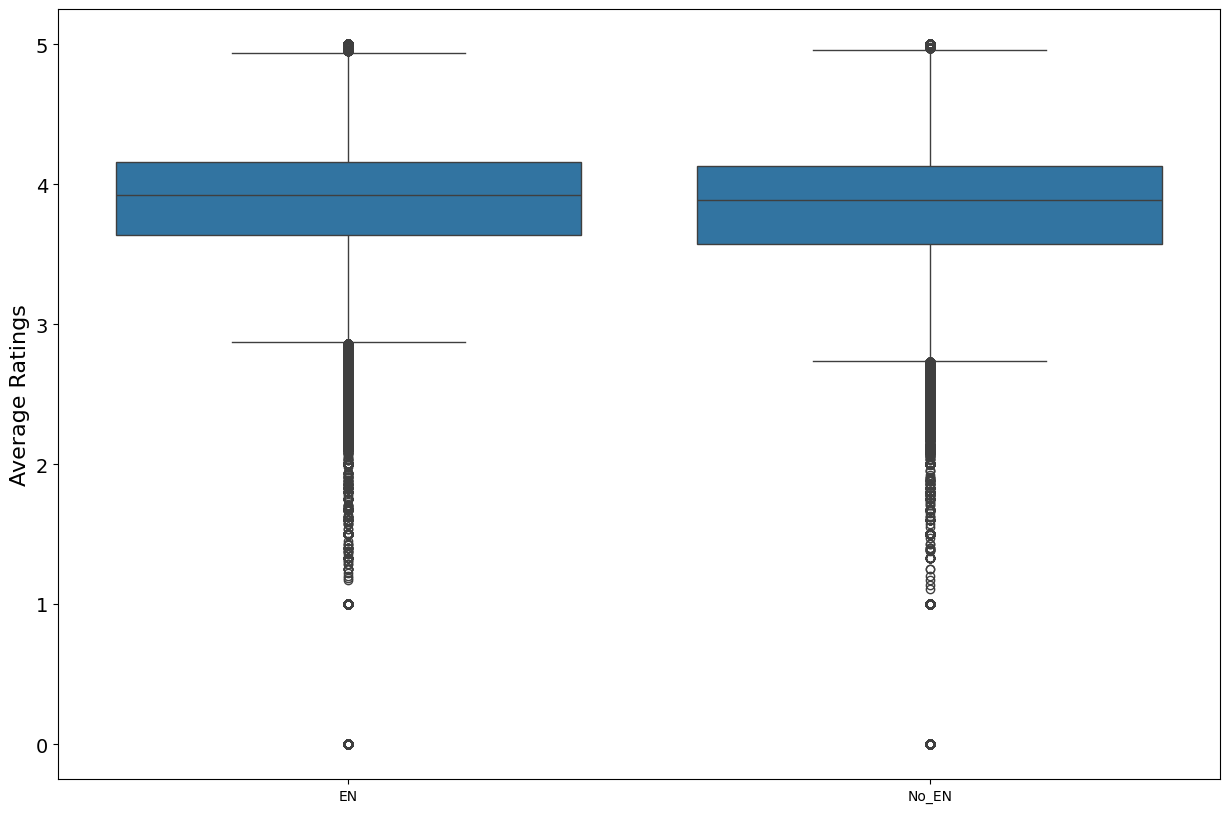

In [55]:
english_ratings = subset[subset['boolean_language']==1]
non_english_ratings= subset[subset['boolean_language'] == 0]

en = []
for elem in english_ratings['average_rating']:
    en.append(elem)
non_en = []
for elem in non_english_ratings['average_rating']:
    non_en.append(elem)

avg_rat = en + non_en

label_en = ['EN' for i in range(len(en))]
label_non_en = ['No_EN' for i in range(len(non_en))]

lab = label_en + label_non_en

d = {'Language': lab, 'Rating': avg_rat}
df = pd.DataFrame(data=d)

plt.figure(figsize=(15, 10))
plt.rcParams['ytick.labelsize'] = 14
ax = sns.boxplot(x="Language", y="Rating", data=df)
ax.set_xlabel("")
ax.set_ylabel("Average Ratings", fontsize=16)
plt.show()

A box plot is a method to graphically represent the variability of data through their quartiles. The edges of the box are the first and third quartiles values of the data, while the line inside of it is the median. The wiskers show the range of the data and the points outside the wiskers are called 'outliers' and represent the measurements that are very distant from the rest of the population. \
**COMMENT:**
As we can see from the box plot, the two groups are very similar in terms of median and quantiles; both have similar quartiles, but the English group has less outliers in the top part, meaning that an english book is more likely to have a high average rating rather than a non-english book. As a support of that, the non-english group has more outliers, both on top and below the wiskers. 

**It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.**

In [7]:
subdf = df_a[['text_reviews_count','fans_count']].dropna(axis=0, how = 'any')
# hypothisis: the fans_count is usually grater to the text_reviews_count for each author.

t_stat, p_value = stats.ttest_ind(subdf['text_reviews_count'], subdf['fans_count'], alternative='less')
print(p_value!=0.0)
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in average ratings.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average ratings.")
print('p-value:', p_value)

True
Fail to reject the null hypothesis: There is no statistically significant difference in average ratings.
p-value: 1.0


**COMMENT** The p-value is so big that it has been rounded up to 1; We failed to reject the null hypothesis with such a big confidence that the null hypothesis may be true, because our p value is bigger than 0.05, which means that the probability of null hypothesis being true is very high.\
In conclusion we can confirm that authors' fans are lazy. 

**Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.**

*Statistic tests in data mining*\
Statistic test is a method of research that is used to make a certain conclusions about data. It starts with setting hypothesis. Null hypothesis is set to fit the conclusion we want to get with the test. That conclusion is usually some equality (for example, average height of boys = average height of girls). Alternative hypothesis is set to explain what a more likely scenario then null hypothesis is, if the test doesn’t provide the convincing evidence that the null-hypothesis is true.\
There are two types of statistical tests: one-sided and two-sided.\
The alternative hypothesis of a one-sided test only takes into an account one alternative to the null hypothesis (for example, average height of boys>average height of girls), while the two-sided test just states that if we don’t find convincing evidence that null hypothesis stands, it is more likely that it doesn’t. That takes into account all the possibilities except null-hypothesis (for example, average height of boys! =average height of girls). The type of statistical test that is better to use depends on the content of the research we do and what conclusion we want to get from it.\
After we make our hypothesis, we have to set the preciseness of our test. It means that we have to define how close our data has to point toward the null hypothesis to convince us that null-hypothesis is most-likely true. 
When we go through with the test, if we managed to get our null-hypothesis with enough precissment, we will accept our null-hypothesis as true. If not, we will say that we reject our null-hypothesis on the account of alternative hypothesis.
+ *T-test* is used to compare the values of expectations of different samples. It is a test that can shows us if some variable is on average higher or lower than another variable.
+ *ANOVA* test is similar to t-test, but it takes into account more than two random variables. It’s null- hypothesis states that all n variables have the same expected value and alternative hypothesis is that they don’t. If we reject the null-hypothesis, we don’t have an information which expectations are inequal, but sometimes that information is irrelevant to us.
+ *F-test* compares variances of random variables. It’s purpose is to figure out if the values of two variables are equally spread in their samples.
+ *T-test*, *F-test* and *ANOVA* are all examples of the parametric tests: tests in which we make hypothesis about some unknown value – parameter.

Non-parametric statistical tests, for example *Chi-square*, *U-test* and *H-test*, do not require a distribution to meet the required assumptions to be analyzed. 
Hypothesis of these tests are usually set to answer whether our data is distributed in a certain way (for example, whether is has normal distribution).
+ *Chi-squared* test is used to examine whether two random variables are independent in influencing the test statistic.
+ The *Kruskal-Wallis H test* is a rank-based nonparametric test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable. It is an alternative way of doing what is usually done with *ANOVA* test.
+ *Mann-Whitney U test* is the non-parametric alternative test to the *t-test*.
We use non-parametric statistical tests if we don’t have conditions under which we can use parametric tests. The most common reasons why we would be forced to use non-parametric tests are:
1.	Our data is not continuous (non-parametric tests can work with ordinal or nominal data)
2.	Our data is too small (we have such a little sample that it’s too unreliable for making assumptions about the whole population on account of it)
3.	Our data doesn’t fit the assumptions under which we perform parametric tests (independence, normal distribution…)



# Command Line Question (CLQ)

1. This is the final result for my implementation. I first wanted to simply iterate through each title and put the sum results in an array but that proved to be too inefficient even for a first try at the algorithm.

![alternative text](original.png)

2. This step is not as straightforward as just asking the LLM (in my case, ChatGPT) to do this piece of code. I first had to explain to him the rough structure of the JSON file. The JSON file is composed of different newline separated entries. Once I figured this out, I gave the LLM an example of one of the entries in the JSON file. 
From this structure and the problem I gave him, it was able to immediately derive a solution that worked first try ! It is important to note that prior to clearing up the structure of the JSON file, it was unable to produce results.

![alternative text](llm.png)

The correctness of the algorithm can be checked using invariants, however, as there is not really a "loop" here, we can't check for loop invariants. Instead, one should realise that $.works[] | .books_count | tonumber$ always produces a list of integers that is always correctly added by the add function. The sort operation always works as it is used on a list of integers. Finally, every series has a title field that we can extract.


# AWS Question (AWSQ)

In [1]:
import time
import json
from tabulate import tabulate
start_time = time.time()

from collections import Counter
c=Counter()
file_path = '/Users/petraudovicic/Desktop/adm/list.json'
with open(file_path, 'r') as f:
    for line in f:
        item=json.loads(line)
        if 'tags' in item:
            for tag in item['tags']:
                c[tag] += 1
t=c.most_common(5)
table = [['tag', '#usage'], [t[0][0], t[0][1]], [t[1][0], t[1][1]], [t[2][0], t[2][1]], [t[3][0], t[3][1]], [t[4][0], t[4][1]]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print(time.time()-start_time)

╒═════════════════╤══════════╕
│ tag             │   #usage │
╞═════════════════╪══════════╡
│ romance         │     6001 │
├─────────────────┼──────────┤
│ fiction         │     5291 │
├─────────────────┼──────────┤
│ young-adult     │     5016 │
├─────────────────┼──────────┤
│ fantasy         │     3666 │
├─────────────────┼──────────┤
│ science-fiction │     2779 │
╘═════════════════╧══════════╛
22.327396869659424


Configuration of the EC2 instance
First we clicked on 'Launch instance'. We named our instacne 'adm_zadaca_2.pem' and chose 'ubuntu' as our operating system. For the instance type we took t2.micro, then created and downloaded the key-pair. We allowed 'SSH traffic from'. in storage, we changed size to 30 GB. We clicked on 'Launch Instance' and our EC2 instance was then created.

How we connected to EC2:
```bash
ssh -i "/Users/petraudovicic/Desktop/adm_zadaca_2.pem" ubuntu@ec2-54-83-108-176.compute-1.amazonaws.com
```

Uploading files to EC2 instance
```bash
scp  -i  "/Users/petraudovicic/Desktop/adm_zadaca_2.pem" "/Users/petraudovicic/Desktop/adm/1.dz.py" "ubuntu@ec2-107-21-59-59.compute-1.amazonaws.com:/home/ubuntu/"

scp  -i  "/Users/petraudovicic/Desktop/adm_zadaca_2.pem" "/Users/petraudovicic/Desktop/adm/list.json" "ubuntu@ec2-107-21-59-59.compute-1.amazonaws.com:/home/ubuntu/"  
```
Runnin code in terminal:
installing python:
```bash
sudo apt update
sudo apt install python3-pip
```
installing tabulate library
```bash
pip install  tabulate
```
running the python code:
```bash
python3 1.dz.py
```
Output we got:
```python
╒═════════════════╤══════════╕
│ tag             │   #usage │
╞═════════════════╪══════════╡
│ romance         │     6001 │
├─────────────────┼──────────┤
│ fiction         │     5291 │
├─────────────────┼──────────┤
│ young-adult     │     5016 │
├─────────────────┼──────────┤
│ fantasy         │     3666 │
├─────────────────┼──────────┤
│ science-fiction │     2779 │
╘═════════════════╧══════════╛
19.382816553115845
```
Running time of the script:
Local system	    EC2 instance
22.327396869659424	19.382816553115845

The python code was slower on our local system which proves that using EC2 has advantages, specially when we have to run codes that take a long time.

# Algorithmic Question (AQ)

1. The easiest algorithm to choose is one using only one list for the whole function. Keep in mind that this will be wholly inefficient. 

In [3]:
import time
import random
from collections import deque

In [7]:
n = int(input())
books = []

for i in range(n):
    # Prompt is the input command (instruction, id of the book)
    prompt = input().split()
    inst, book_id = prompt[0], int(prompt[1])
    
    # We split into 3 cases
    if inst == 'L':
        # As we have seen in the lesson, this is highly inefficient
        books.insert(0, book_id)
    
    elif inst == 'R':
        books.append(book_id)
    
    elif inst == '?':
        idx = books.index(book_id)
        
        # This checks if we should remove books from the right or the left (depending on if the book with this
        # book_id is closest to which end)
        min_nb =  min(idx, len(books) - 1 - idx)
        print(min_nb)

8
L 75
R 20
R 30
L 11
? 75
1
L 12
L 15
? 20
1


2. If we give ChatGPT this code and ask him to evaluate the "complexity" of this code, we get this : 


**Time Complexity**:
The worst-case time complexity for inserting a book to the leftmost position is O(n) (since all elements might need to be shifted), and for finding a book's index it's also $O(n)$. If we have n instructions, then in the worst-case scenario, the time complexity is $O(n^2)$.

**Space Complexity**:
We are using a single list to represent the shelf, which can grow up to n in size. Therefore, the space complexity is $O(n)$.

I do believe this is correct, we can check it directly:

In [10]:
for n in [10**4, 10**5]:
    
    # Generate random data
    books_id = set()
    books = []
    commands = []
    for _ in range(n):
        # We choose a random operation each time
        inst = random.choice(['L', 'R', '?'])
        book_id = random.randint(1, n)
        
        # the ? operation can only be done on books that are on the shelf
        if inst == '?' and book_id not in books_id:
            continue
        else:
            books_id.add(book_id)
            commands.append((inst, book_id))
    
    # Measure time using the time library
    start_time = time.time()
    
    for command in commands:
        inst, book_id = command
        
        if inst == 'L':
            books.insert(0, book_id)
    
        elif inst == 'R':
            books.append(book_id)
    
        elif inst == '?':
            idx = books.index(book_id)
            min_nb =  min(idx, len(books) - 1 - idx)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"For n={n}, time taken: {elapsed_time} seconds")

For n=10000, time taken: 0.03560328483581543 seconds
For n=100000, time taken: 4.400903701782227 seconds


We can see that the time taken for n = $10^5$ is roughly 100 times that taken for n = $10^4$, this suggests that this algorithm is $O(n^2)$ in time complexity.

3. The problem asks to add and remove elements on the shelf from the right AND the left. The data structure that fits these requirements in the most efficient way is a double ended queue (or a deque)

In [11]:
n = int(input())

# We use a deque for this problem
books = deque()
idx = {}

# The two counters for each side, one of them must start at 0 so as to not create a gap
idx_left = -1
idx_right = 0

for i in range(n):
    # Prompt is the input command (instruction, id of the book)
    prompt = input().split()
    inst, book_id = prompt[0], int(prompt[1])
    
    # We split into 3 cases
    if inst == 'L':
        # This is a lot more computationally efficient (O(1)) than insert for the list
        books.appendleft(book_id)
        # We use a dictionnary for constant time lookup
        idx[book_id] = idx_left
        # To avoid complications with the left side, each side should have a different counter
        # Each time an element is added, increment the counter for that side
        idx_left -= 1
    
    elif inst == 'R':
        books.append(book_id)
        idx[book_id] = idx_right
        idx_right += 1
    
    elif inst == '?':
        idx_book = idx[book_id]
        
        # This is the "true id" of the book in the sequence, i.e it starts at 0
        true_idx = idx_book + abs(idx_left)
        min_nb = min(true_idx - 1, len(books) - true_idx) 
        print(min_nb)
    

8
L 75
R 20
R 30
L 11
? 75
1
L 12
L 15
? 20
1


We have to use a dictionary for the index of the books as the index() function of the deque would be $O(n)$ at worst when the lookup time for a dictionary is constant.

This is a more efficient algorithm because all the operations that we use on the deque are $O(1)$ worst-case. Since we iterate through n elements, the algorithm will be $O(n)$ worst-case.

It is also **optimal** as we need to iterate through n elements at the very least, we hence can't go below $O(n)$